In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle
from library import utils, config, cascades

In [2]:
with open('./results/nopricechange/7-9/traderIDs_1000_5000_100_2_5.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolNPC = np.load("./results/nopricechange/7-9/stockPool_1000_5000_100_2_5.npy")
hurstPoolNPC = np.load("./results/nopricechange/7-9/hurstPool_1000_5000_100_2_5.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_1000_5000_100_2_5.csv")

In [4]:
TtotalOrdersNPC

,Unnamed: 0,time,portfolio,stock,order
0,0,993,sniel,86,1.0
1,0,993,yeqal,83,-1.0
2,2,993,yeqal,85,2.0
3,0,993,tcnoe,73,3.0
4,1,993,tcnoe,74,-3.0
...,...,...,...,...,...
2136648,2,5992,lekvh,62,16.0
2136649,0,5992,uesjc,42,5.0
2136650,3,5992,uesjc,50,-7.0
2136651,1,5992,vuemj,58,7.0


In [5]:
type(TtotalOrdersNPC)

cudf.core.dataframe.DataFrame

# minSep = 1

In [25]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192,1)

TypeError: where() missing 1 required positional argument: 'cond'

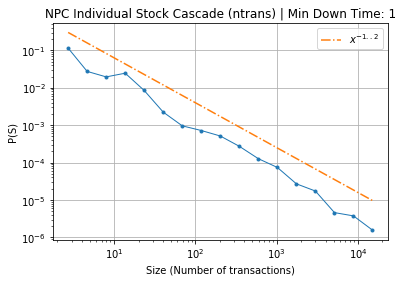

In [12]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

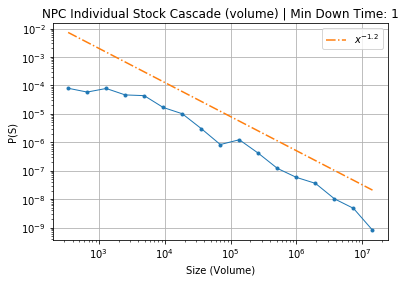

In [13]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

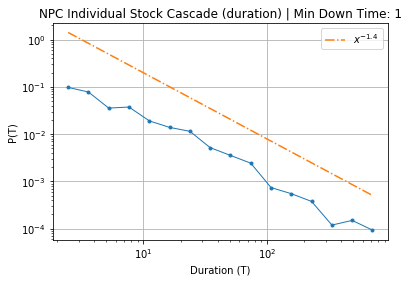

In [14]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [15]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 2)

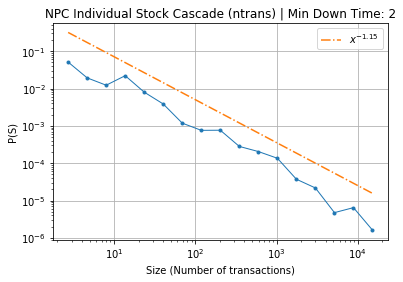

In [16]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

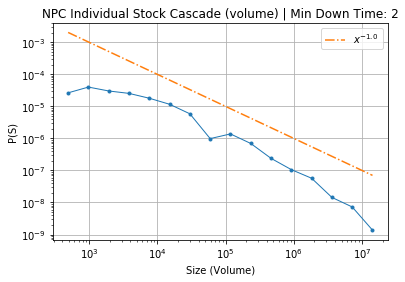

In [17]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

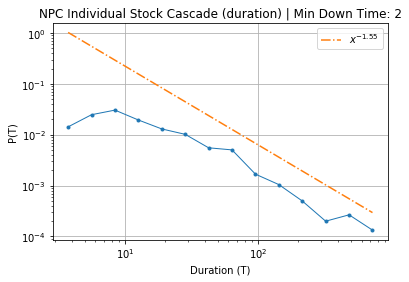

In [18]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [19]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 5)

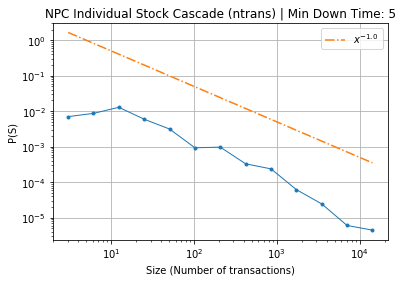

In [20]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

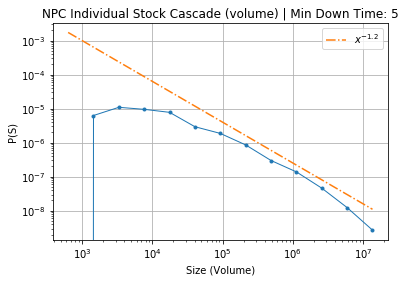

In [21]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

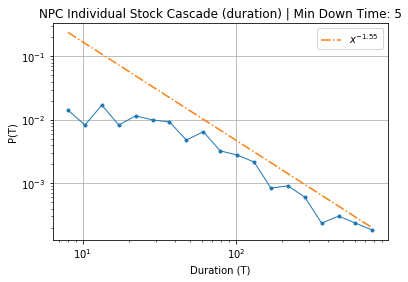

In [22]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [23]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 8192, 10)

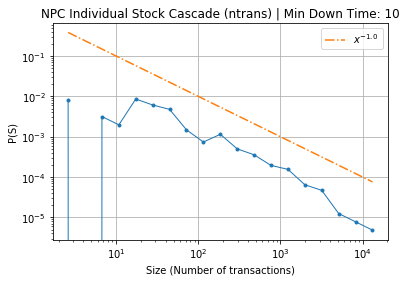

In [24]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

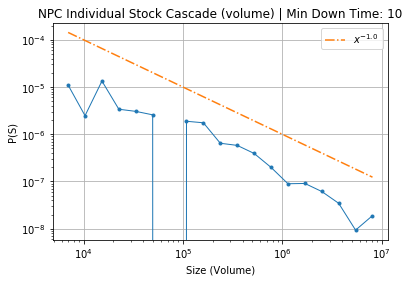

In [25]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

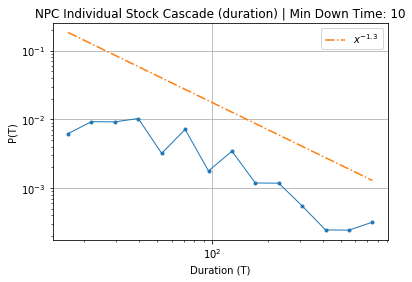

In [26]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [6]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    TtotalOrders = TtotalOrdersNPC
    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [8]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades22_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2136653
Cascade length:  5629
New Orders left:  2131024
making new cascade


OG Orders left:  2131024
Cascade length:  5282
New Orders left:  2125742
making new cascade


OG Orders left:  2125742
Cascade length:  4954
New Orders left:  2120788
making new cascade


OG Orders left:  2120788
Cascade length:  3791
New Orders left:  2116997
making new cascade


OG Orders left:  2116997


KeyboardInterrupt: 

In [ ]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades21_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades12_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades11_npc_1000_5000_100_2_5.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2136653
Cascade length:  2665
New Orders left:  2133988
making new cascade


OG Orders left:  2133988
Cascade length:  2500
New Orders left:  2131488
making new cascade


OG Orders left:  2131488
Cascade length:  2432
New Orders left:  2129056
making new cascade


OG Orders left:  2129056
Cascade length:  2374
New Orders left:  2126682
making new cascade


OG Orders left:  2126682
Cascade length:  2221
New Orders left:  2124461
making new cascade


OG Orders left:  2124461
Cascade length:  1
New Orders left:  2124460
making new cascade


OG Orders left:  2124460
Cascade length:  2499
New Orders left:  2121961
making new cascade


OG Orders left:  2121961
Cascade length:  1
New Orders left:  2121960
making new cascade


OG Orders left:  2121960
Cascade length:  1
New Orders left:  2121959
making new cascade


OG Orders left:  2121959
Cascade length:  4
New Orders left:  2121955
making new cascade


OG Orders left:  2121955
Cascade length:  2301
New Orders left:  2119654

Cascade length:  1551
New Orders left:  2042925
making new cascade


OG Orders left:  2042925
Cascade length:  1
New Orders left:  2042924
making new cascade


OG Orders left:  2042924
Cascade length:  11
New Orders left:  2042913
making new cascade


OG Orders left:  2042913
Cascade length:  1
New Orders left:  2042912
making new cascade


OG Orders left:  2042912
Cascade length:  4
New Orders left:  2042908
making new cascade


OG Orders left:  2042908
Cascade length:  2
New Orders left:  2042906
making new cascade


OG Orders left:  2042906
Cascade length:  2
New Orders left:  2042904
making new cascade


OG Orders left:  2042904
Cascade length:  1213
New Orders left:  2041691
making new cascade


OG Orders left:  2041691
Cascade length:  1
New Orders left:  2041690
making new cascade


OG Orders left:  2041690
Cascade length:  1663
New Orders left:  2040027
making new cascade


OG Orders left:  2040027
Cascade length:  9
New Orders left:  2040018
making new cascade


OG Orders left

Cascade length:  31
New Orders left:  1998463
making new cascade


OG Orders left:  1998463
Cascade length:  1258
New Orders left:  1997205
making new cascade


OG Orders left:  1997205
Cascade length:  1444
New Orders left:  1995761
making new cascade


OG Orders left:  1995761
Cascade length:  2
New Orders left:  1995759
making new cascade


OG Orders left:  1995759
Cascade length:  941
New Orders left:  1994818
making new cascade


OG Orders left:  1994818
Cascade length:  1255
New Orders left:  1993563
making new cascade


OG Orders left:  1993563
Cascade length:  825
New Orders left:  1992738
making new cascade


OG Orders left:  1992738
Cascade length:  3
New Orders left:  1992735
making new cascade


OG Orders left:  1992735
Cascade length:  2
New Orders left:  1992733
making new cascade


OG Orders left:  1992733
Cascade length:  19
New Orders left:  1992714
making new cascade


OG Orders left:  1992714
Cascade length:  1022
New Orders left:  1991692
making new cascade


OG Ord

Cascade length:  1291
New Orders left:  1963576
making new cascade


OG Orders left:  1963576
Cascade length:  1116
New Orders left:  1962460
making new cascade


OG Orders left:  1962460
Cascade length:  4
New Orders left:  1962456
making new cascade


OG Orders left:  1962456
Cascade length:  2
New Orders left:  1962454
making new cascade


OG Orders left:  1962454
Cascade length:  28
New Orders left:  1962426
making new cascade


OG Orders left:  1962426
Cascade length:  359
New Orders left:  1962067
making new cascade


OG Orders left:  1962067
Cascade length:  13
New Orders left:  1962054
making new cascade


OG Orders left:  1962054
Cascade length:  6
New Orders left:  1962048
making new cascade


OG Orders left:  1962048
Cascade length:  47
New Orders left:  1962001
making new cascade


OG Orders left:  1962001
Cascade length:  9
New Orders left:  1961992
making new cascade


OG Orders left:  1961992
Cascade length:  4
New Orders left:  1961988
making new cascade


OG Orders lef

Cascade length:  1
New Orders left:  1936125
making new cascade


OG Orders left:  1936125
Cascade length:  13
New Orders left:  1936112
making new cascade


OG Orders left:  1936112
Cascade length:  504
New Orders left:  1935608
making new cascade


OG Orders left:  1935608
Cascade length:  2
New Orders left:  1935606
making new cascade


OG Orders left:  1935606
Cascade length:  11
New Orders left:  1935595
making new cascade


OG Orders left:  1935595
Cascade length:  1389
New Orders left:  1934206
making new cascade


OG Orders left:  1934206
Cascade length:  84
New Orders left:  1934122
making new cascade


OG Orders left:  1934122
Cascade length:  14
New Orders left:  1934108
making new cascade


OG Orders left:  1934108
Cascade length:  1261
New Orders left:  1932847
making new cascade


OG Orders left:  1932847
Cascade length:  69
New Orders left:  1932778
making new cascade


OG Orders left:  1932778
Cascade length:  874
New Orders left:  1931904
making new cascade


OG Orders

Cascade length:  2
New Orders left:  1914771
making new cascade


OG Orders left:  1914771
Cascade length:  56
New Orders left:  1914715
making new cascade


OG Orders left:  1914715
Cascade length:  15
New Orders left:  1914700
making new cascade


OG Orders left:  1914700
Cascade length:  67
New Orders left:  1914633
making new cascade


OG Orders left:  1914633
Cascade length:  917
New Orders left:  1913716
making new cascade


OG Orders left:  1913716
Cascade length:  52
New Orders left:  1913664
making new cascade


OG Orders left:  1913664
Cascade length:  2
New Orders left:  1913662
making new cascade


OG Orders left:  1913662
Cascade length:  82
New Orders left:  1913580
making new cascade


OG Orders left:  1913580
Cascade length:  5
New Orders left:  1913575
making new cascade


OG Orders left:  1913575
Cascade length:  19
New Orders left:  1913556
making new cascade


OG Orders left:  1913556
Cascade length:  62
New Orders left:  1913494
making new cascade


OG Orders left:

Cascade length:  95
New Orders left:  1896506
making new cascade


OG Orders left:  1896506
Cascade length:  1114
New Orders left:  1895392
making new cascade


OG Orders left:  1895392
Cascade length:  598
New Orders left:  1894794
making new cascade


OG Orders left:  1894794
Cascade length:  30
New Orders left:  1894764
making new cascade


OG Orders left:  1894764
Cascade length:  6
New Orders left:  1894758
making new cascade


OG Orders left:  1894758
Cascade length:  29
New Orders left:  1894729
making new cascade


OG Orders left:  1894729
Cascade length:  662
New Orders left:  1894067
making new cascade


OG Orders left:  1894067
Cascade length:  9
New Orders left:  1894058
making new cascade


OG Orders left:  1894058
Cascade length:  10
New Orders left:  1894048
making new cascade


OG Orders left:  1894048
Cascade length:  576
New Orders left:  1893472
making new cascade


OG Orders left:  1893472
Cascade length:  446
New Orders left:  1893026
making new cascade


OG Orders

Cascade length:  61
New Orders left:  1880187
making new cascade


OG Orders left:  1880187
Cascade length:  175
New Orders left:  1880012
making new cascade


OG Orders left:  1880012
Cascade length:  159
New Orders left:  1879853
making new cascade


OG Orders left:  1879853
Cascade length:  27
New Orders left:  1879826
making new cascade


OG Orders left:  1879826
Cascade length:  173
New Orders left:  1879653
making new cascade


OG Orders left:  1879653
Cascade length:  9
New Orders left:  1879644
making new cascade


OG Orders left:  1879644
Cascade length:  8
New Orders left:  1879636
making new cascade


OG Orders left:  1879636
Cascade length:  19
New Orders left:  1879617
making new cascade


OG Orders left:  1879617
Cascade length:  568
New Orders left:  1879049
making new cascade


OG Orders left:  1879049
Cascade length:  6
New Orders left:  1879043
making new cascade


OG Orders left:  1879043
Cascade length:  17
New Orders left:  1879026
making new cascade


OG Orders le

Cascade length:  607
New Orders left:  1864738
making new cascade


OG Orders left:  1864738
Cascade length:  44
New Orders left:  1864694
making new cascade


OG Orders left:  1864694
Cascade length:  130
New Orders left:  1864564
making new cascade


OG Orders left:  1864564
Cascade length:  20
New Orders left:  1864544
making new cascade


OG Orders left:  1864544
Cascade length:  113
New Orders left:  1864431
making new cascade


OG Orders left:  1864431
Cascade length:  1
New Orders left:  1864430
making new cascade


OG Orders left:  1864430
Cascade length:  1
New Orders left:  1864429
making new cascade


OG Orders left:  1864429
Cascade length:  6
New Orders left:  1864423
making new cascade


OG Orders left:  1864423
Cascade length:  462
New Orders left:  1863961
making new cascade


OG Orders left:  1863961
Cascade length:  61
New Orders left:  1863900
making new cascade


OG Orders left:  1863900
Cascade length:  1
New Orders left:  1863899
making new cascade


OG Orders lef

Cascade length:  19
New Orders left:  1852167
making new cascade


OG Orders left:  1852167
Cascade length:  3
New Orders left:  1852164
making new cascade


OG Orders left:  1852164
Cascade length:  8
New Orders left:  1852156
making new cascade


OG Orders left:  1852156
Cascade length:  140
New Orders left:  1852016
making new cascade


OG Orders left:  1852016
Cascade length:  81
New Orders left:  1851935
making new cascade


OG Orders left:  1851935
Cascade length:  59
New Orders left:  1851876
making new cascade


OG Orders left:  1851876
Cascade length:  11
New Orders left:  1851865
making new cascade


OG Orders left:  1851865
Cascade length:  2
New Orders left:  1851863
making new cascade


OG Orders left:  1851863
Cascade length:  185
New Orders left:  1851678
making new cascade


OG Orders left:  1851678
Cascade length:  25
New Orders left:  1851653
making new cascade


OG Orders left:  1851653
Cascade length:  2
New Orders left:  1851651
making new cascade


OG Orders left:

Cascade length:  8
New Orders left:  1838164
making new cascade


OG Orders left:  1838164
Cascade length:  64
New Orders left:  1838100
making new cascade


OG Orders left:  1838100
Cascade length:  2
New Orders left:  1838098
making new cascade


OG Orders left:  1838098
Cascade length:  13
New Orders left:  1838085
making new cascade


OG Orders left:  1838085
Cascade length:  38
New Orders left:  1838047
making new cascade


OG Orders left:  1838047
Cascade length:  1
New Orders left:  1838046
making new cascade


OG Orders left:  1838046
Cascade length:  84
New Orders left:  1837962
making new cascade


OG Orders left:  1837962
Cascade length:  829
New Orders left:  1837133
making new cascade


OG Orders left:  1837133
Cascade length:  174
New Orders left:  1836959
making new cascade


OG Orders left:  1836959
Cascade length:  780
New Orders left:  1836179
making new cascade


OG Orders left:  1836179
Cascade length:  19
New Orders left:  1836160
making new cascade


OG Orders lef

Cascade length:  9
New Orders left:  1826811
making new cascade


OG Orders left:  1826811
Cascade length:  518
New Orders left:  1826293
making new cascade


OG Orders left:  1826293
Cascade length:  30
New Orders left:  1826263
making new cascade


OG Orders left:  1826263
Cascade length:  1
New Orders left:  1826262
making new cascade


OG Orders left:  1826262
Cascade length:  2
New Orders left:  1826260
making new cascade


OG Orders left:  1826260
Cascade length:  50
New Orders left:  1826210
making new cascade


OG Orders left:  1826210
Cascade length:  40
New Orders left:  1826170
making new cascade


OG Orders left:  1826170
Cascade length:  53
New Orders left:  1826117
making new cascade


OG Orders left:  1826117
Cascade length:  20
New Orders left:  1826097
making new cascade


OG Orders left:  1826097
Cascade length:  5
New Orders left:  1826092
making new cascade


OG Orders left:  1826092
Cascade length:  181
New Orders left:  1825911
making new cascade


OG Orders left:

Cascade length:  1
New Orders left:  1813344
making new cascade


OG Orders left:  1813344
Cascade length:  15
New Orders left:  1813329
making new cascade


OG Orders left:  1813329
Cascade length:  6
New Orders left:  1813323
making new cascade


OG Orders left:  1813323
Cascade length:  26
New Orders left:  1813297
making new cascade


OG Orders left:  1813297
Cascade length:  1
New Orders left:  1813296
making new cascade


OG Orders left:  1813296
Cascade length:  313
New Orders left:  1812983
making new cascade


OG Orders left:  1812983
Cascade length:  2
New Orders left:  1812981
making new cascade


OG Orders left:  1812981
Cascade length:  4
New Orders left:  1812977
making new cascade


OG Orders left:  1812977
Cascade length:  15
New Orders left:  1812962
making new cascade


OG Orders left:  1812962
Cascade length:  288
New Orders left:  1812674
making new cascade


OG Orders left:  1812674
Cascade length:  1
New Orders left:  1812673
making new cascade


OG Orders left:  

Cascade length:  205
New Orders left:  1793504
making new cascade


OG Orders left:  1793504
Cascade length:  9
New Orders left:  1793495
making new cascade


OG Orders left:  1793495
Cascade length:  317
New Orders left:  1793178
making new cascade


OG Orders left:  1793178
Cascade length:  363
New Orders left:  1792815
making new cascade


OG Orders left:  1792815
Cascade length:  1
New Orders left:  1792814
making new cascade


OG Orders left:  1792814
Cascade length:  1717
New Orders left:  1791097
making new cascade


OG Orders left:  1791097
Cascade length:  22
New Orders left:  1791075
making new cascade


OG Orders left:  1791075
Cascade length:  19
New Orders left:  1791056
making new cascade


OG Orders left:  1791056
Cascade length:  10
New Orders left:  1791046
making new cascade


OG Orders left:  1791046
Cascade length:  1
New Orders left:  1791045
making new cascade


OG Orders left:  1791045
Cascade length:  5
New Orders left:  1791040
making new cascade


OG Orders le

Cascade length:  980
New Orders left:  1776079
making new cascade


OG Orders left:  1776079
Cascade length:  70
New Orders left:  1776009
making new cascade


OG Orders left:  1776009
Cascade length:  16
New Orders left:  1775993
making new cascade


OG Orders left:  1775993
Cascade length:  2
New Orders left:  1775991
making new cascade


OG Orders left:  1775991
Cascade length:  10
New Orders left:  1775981
making new cascade


OG Orders left:  1775981
Cascade length:  2
New Orders left:  1775979
making new cascade


OG Orders left:  1775979
Cascade length:  19
New Orders left:  1775960
making new cascade


OG Orders left:  1775960
Cascade length:  1
New Orders left:  1775959
making new cascade


OG Orders left:  1775959
Cascade length:  12
New Orders left:  1775947
making new cascade


OG Orders left:  1775947
Cascade length:  15
New Orders left:  1775932
making new cascade


OG Orders left:  1775932
Cascade length:  98
New Orders left:  1775834
making new cascade


OG Orders left:

Cascade length:  14
New Orders left:  1759104
making new cascade


OG Orders left:  1759104
Cascade length:  4
New Orders left:  1759100
making new cascade


OG Orders left:  1759100
Cascade length:  29
New Orders left:  1759071
making new cascade


OG Orders left:  1759071
Cascade length:  481
New Orders left:  1758590
making new cascade


OG Orders left:  1758590
Cascade length:  5
New Orders left:  1758585
making new cascade


OG Orders left:  1758585
Cascade length:  1217
New Orders left:  1757368
making new cascade


OG Orders left:  1757368
Cascade length:  990
New Orders left:  1756378
making new cascade


OG Orders left:  1756378
Cascade length:  5
New Orders left:  1756373
making new cascade


OG Orders left:  1756373
Cascade length:  27
New Orders left:  1756346
making new cascade


OG Orders left:  1756346
Cascade length:  581
New Orders left:  1755765
making new cascade


OG Orders left:  1755765
Cascade length:  1
New Orders left:  1755764
making new cascade


OG Orders le

Cascade length:  2
New Orders left:  1740383
making new cascade


OG Orders left:  1740383
Cascade length:  237
New Orders left:  1740146
making new cascade


OG Orders left:  1740146
Cascade length:  538
New Orders left:  1739608
making new cascade


OG Orders left:  1739608
Cascade length:  691
New Orders left:  1738917
making new cascade


OG Orders left:  1738917
Cascade length:  21
New Orders left:  1738896
making new cascade


OG Orders left:  1738896
Cascade length:  68
New Orders left:  1738828
making new cascade


OG Orders left:  1738828
Cascade length:  9
New Orders left:  1738819
making new cascade


OG Orders left:  1738819
Cascade length:  1227
New Orders left:  1737592
making new cascade


OG Orders left:  1737592
Cascade length:  2
New Orders left:  1737590
making new cascade


OG Orders left:  1737590
Cascade length:  1
New Orders left:  1737589
making new cascade


OG Orders left:  1737589
Cascade length:  617
New Orders left:  1736972
making new cascade


OG Orders l

Cascade length:  24
New Orders left:  1725283
making new cascade


OG Orders left:  1725283
Cascade length:  2
New Orders left:  1725281
making new cascade


OG Orders left:  1725281
Cascade length:  634
New Orders left:  1724647
making new cascade


OG Orders left:  1724647
Cascade length:  10
New Orders left:  1724637
making new cascade


OG Orders left:  1724637
Cascade length:  12
New Orders left:  1724625
making new cascade


OG Orders left:  1724625
Cascade length:  36
New Orders left:  1724589
making new cascade


OG Orders left:  1724589
Cascade length:  18
New Orders left:  1724571
making new cascade


OG Orders left:  1724571
Cascade length:  4
New Orders left:  1724567
making new cascade


OG Orders left:  1724567
Cascade length:  9
New Orders left:  1724558
making new cascade


OG Orders left:  1724558
Cascade length:  18
New Orders left:  1724540
making new cascade


OG Orders left:  1724540
Cascade length:  3
New Orders left:  1724537
making new cascade


OG Orders left: 

Cascade length:  31
New Orders left:  1707058
making new cascade


OG Orders left:  1707058
Cascade length:  1
New Orders left:  1707057
making new cascade


OG Orders left:  1707057
Cascade length:  16
New Orders left:  1707041
making new cascade


OG Orders left:  1707041
Cascade length:  21
New Orders left:  1707020
making new cascade


OG Orders left:  1707020
Cascade length:  61
New Orders left:  1706959
making new cascade


OG Orders left:  1706959
Cascade length:  66
New Orders left:  1706893
making new cascade


OG Orders left:  1706893
Cascade length:  2
New Orders left:  1706891
making new cascade


OG Orders left:  1706891
Cascade length:  1522
New Orders left:  1705369
making new cascade


OG Orders left:  1705369
Cascade length:  15
New Orders left:  1705354
making new cascade


OG Orders left:  1705354
Cascade length:  19
New Orders left:  1705335
making new cascade


OG Orders left:  1705335
Cascade length:  6
New Orders left:  1705329
making new cascade


OG Orders left

Cascade length:  6
New Orders left:  1690828
making new cascade


OG Orders left:  1690828
Cascade length:  900
New Orders left:  1689928
making new cascade


OG Orders left:  1689928
Cascade length:  1
New Orders left:  1689927
making new cascade


OG Orders left:  1689927
Cascade length:  20
New Orders left:  1689907
making new cascade


OG Orders left:  1689907
Cascade length:  1
New Orders left:  1689906
making new cascade


OG Orders left:  1689906
Cascade length:  31
New Orders left:  1689875
making new cascade


OG Orders left:  1689875
Cascade length:  114
New Orders left:  1689761
making new cascade


OG Orders left:  1689761
Cascade length:  1
New Orders left:  1689760
making new cascade


OG Orders left:  1689760
Cascade length:  25
New Orders left:  1689735
making new cascade


OG Orders left:  1689735
Cascade length:  581
New Orders left:  1689154
making new cascade


OG Orders left:  1689154
Cascade length:  18
New Orders left:  1689136
making new cascade


OG Orders left

Cascade length:  24
New Orders left:  1672198
making new cascade


OG Orders left:  1672198
Cascade length:  5
New Orders left:  1672193
making new cascade


OG Orders left:  1672193
Cascade length:  562
New Orders left:  1671631
making new cascade


OG Orders left:  1671631
Cascade length:  1624
New Orders left:  1670007
making new cascade


OG Orders left:  1670007
Cascade length:  1047
New Orders left:  1668960
making new cascade


OG Orders left:  1668960
Cascade length:  376
New Orders left:  1668584
making new cascade


OG Orders left:  1668584
Cascade length:  741
New Orders left:  1667843
making new cascade


OG Orders left:  1667843
Cascade length:  4
New Orders left:  1667839
making new cascade


OG Orders left:  1667839
Cascade length:  22
New Orders left:  1667817
making new cascade


OG Orders left:  1667817
Cascade length:  1073
New Orders left:  1666744
making new cascade


OG Orders left:  1666744
Cascade length:  850
New Orders left:  1665894
making new cascade


OG Or

Cascade length:  72
New Orders left:  1652585
making new cascade


OG Orders left:  1652585
Cascade length:  1382
New Orders left:  1651203
making new cascade


OG Orders left:  1651203
Cascade length:  1236
New Orders left:  1649967
making new cascade


OG Orders left:  1649967
Cascade length:  20
New Orders left:  1649947
making new cascade


OG Orders left:  1649947
Cascade length:  17
New Orders left:  1649930
making new cascade


OG Orders left:  1649930
Cascade length:  6
New Orders left:  1649924
making new cascade


OG Orders left:  1649924
Cascade length:  15
New Orders left:  1649909
making new cascade


OG Orders left:  1649909
Cascade length:  5
New Orders left:  1649904
making new cascade


OG Orders left:  1649904
Cascade length:  8
New Orders left:  1649896
making new cascade


OG Orders left:  1649896
Cascade length:  638
New Orders left:  1649258
making new cascade


OG Orders left:  1649258
Cascade length:  686
New Orders left:  1648572
making new cascade


OG Orders 

Cascade length:  3
New Orders left:  1632799
making new cascade


OG Orders left:  1632799
Cascade length:  9
New Orders left:  1632790
making new cascade


OG Orders left:  1632790
Cascade length:  11
New Orders left:  1632779
making new cascade


OG Orders left:  1632779
Cascade length:  709
New Orders left:  1632070
making new cascade


OG Orders left:  1632070
Cascade length:  20
New Orders left:  1632050
making new cascade


OG Orders left:  1632050
Cascade length:  576
New Orders left:  1631474
making new cascade


OG Orders left:  1631474
Cascade length:  16
New Orders left:  1631458
making new cascade


OG Orders left:  1631458
Cascade length:  7
New Orders left:  1631451
making new cascade


OG Orders left:  1631451
Cascade length:  699
New Orders left:  1630752
making new cascade


OG Orders left:  1630752
Cascade length:  7
New Orders left:  1630745
making new cascade


OG Orders left:  1630745
Cascade length:  3
New Orders left:  1630742
making new cascade


OG Orders left:

Cascade length:  4
New Orders left:  1617000
making new cascade


OG Orders left:  1617000
Cascade length:  3
New Orders left:  1616997
making new cascade


OG Orders left:  1616997
Cascade length:  433
New Orders left:  1616564
making new cascade


OG Orders left:  1616564
Cascade length:  666
New Orders left:  1615898
making new cascade


OG Orders left:  1615898
Cascade length:  1
New Orders left:  1615897
making new cascade


OG Orders left:  1615897
Cascade length:  9
New Orders left:  1615888
making new cascade


OG Orders left:  1615888
Cascade length:  4
New Orders left:  1615884
making new cascade


OG Orders left:  1615884
Cascade length:  19
New Orders left:  1615865
making new cascade


OG Orders left:  1615865
Cascade length:  1
New Orders left:  1615864
making new cascade


OG Orders left:  1615864
Cascade length:  2
New Orders left:  1615862
making new cascade


OG Orders left:  1615862
Cascade length:  604
New Orders left:  1615258
making new cascade


OG Orders left:  

Cascade length:  608
New Orders left:  1596122
making new cascade


OG Orders left:  1596122
Cascade length:  427
New Orders left:  1595695
making new cascade


OG Orders left:  1595695
Cascade length:  47
New Orders left:  1595648
making new cascade


OG Orders left:  1595648
Cascade length:  52
New Orders left:  1595596
making new cascade


OG Orders left:  1595596
Cascade length:  35
New Orders left:  1595561
making new cascade


OG Orders left:  1595561
Cascade length:  453
New Orders left:  1595108
making new cascade


OG Orders left:  1595108
Cascade length:  2
New Orders left:  1595106
making new cascade


OG Orders left:  1595106
Cascade length:  11
New Orders left:  1595095
making new cascade


OG Orders left:  1595095
Cascade length:  38
New Orders left:  1595057
making new cascade


OG Orders left:  1595057
Cascade length:  525
New Orders left:  1594532
making new cascade


OG Orders left:  1594532
Cascade length:  2
New Orders left:  1594530
making new cascade


OG Orders l

Cascade length:  2
New Orders left:  1579444
making new cascade


OG Orders left:  1579444
Cascade length:  499
New Orders left:  1578945
making new cascade


OG Orders left:  1578945
Cascade length:  2
New Orders left:  1578943
making new cascade


OG Orders left:  1578943
Cascade length:  15
New Orders left:  1578928
making new cascade


OG Orders left:  1578928
Cascade length:  2
New Orders left:  1578926
making new cascade


OG Orders left:  1578926
Cascade length:  867
New Orders left:  1578059
making new cascade


OG Orders left:  1578059
Cascade length:  572
New Orders left:  1577487
making new cascade


OG Orders left:  1577487
Cascade length:  887
New Orders left:  1576600
making new cascade


OG Orders left:  1576600
Cascade length:  1
New Orders left:  1576599
making new cascade


OG Orders left:  1576599
Cascade length:  43
New Orders left:  1576556
making new cascade


OG Orders left:  1576556
Cascade length:  3
New Orders left:  1576553
making new cascade


OG Orders left

Cascade length:  3
New Orders left:  1558307
making new cascade


OG Orders left:  1558307
Cascade length:  16
New Orders left:  1558291
making new cascade


OG Orders left:  1558291
Cascade length:  4
New Orders left:  1558287
making new cascade


OG Orders left:  1558287
Cascade length:  13
New Orders left:  1558274
making new cascade


OG Orders left:  1558274
Cascade length:  53
New Orders left:  1558221
making new cascade


OG Orders left:  1558221
Cascade length:  366
New Orders left:  1557855
making new cascade


OG Orders left:  1557855
Cascade length:  1
New Orders left:  1557854
making new cascade


OG Orders left:  1557854
Cascade length:  6
New Orders left:  1557848
making new cascade


OG Orders left:  1557848
Cascade length:  781
New Orders left:  1557067
making new cascade


OG Orders left:  1557067
Cascade length:  2
New Orders left:  1557065
making new cascade


OG Orders left:  1557065
Cascade length:  18
New Orders left:  1557047
making new cascade


OG Orders left: 

Cascade length:  644
New Orders left:  1536514
making new cascade


OG Orders left:  1536514
Cascade length:  13
New Orders left:  1536501
making new cascade


OG Orders left:  1536501
Cascade length:  3
New Orders left:  1536498
making new cascade


OG Orders left:  1536498
Cascade length:  956
New Orders left:  1535542
making new cascade


OG Orders left:  1535542
Cascade length:  11
New Orders left:  1535531
making new cascade


OG Orders left:  1535531
Cascade length:  2
New Orders left:  1535529
making new cascade


OG Orders left:  1535529
Cascade length:  342
New Orders left:  1535187
making new cascade


OG Orders left:  1535187
Cascade length:  1
New Orders left:  1535186
making new cascade


OG Orders left:  1535186
Cascade length:  1
New Orders left:  1535185
making new cascade


OG Orders left:  1535185
Cascade length:  944
New Orders left:  1534241
making new cascade


OG Orders left:  1534241
Cascade length:  1094
New Orders left:  1533147
making new cascade


OG Orders l

Cascade length:  248
New Orders left:  1516146
making new cascade


OG Orders left:  1516146
Cascade length:  13
New Orders left:  1516133
making new cascade


OG Orders left:  1516133
Cascade length:  843
New Orders left:  1515290
making new cascade


OG Orders left:  1515290
Cascade length:  968
New Orders left:  1514322
making new cascade


OG Orders left:  1514322
Cascade length:  3
New Orders left:  1514319
making new cascade


OG Orders left:  1514319
Cascade length:  892
New Orders left:  1513427
making new cascade


OG Orders left:  1513427
Cascade length:  1
New Orders left:  1513426
making new cascade


OG Orders left:  1513426
Cascade length:  1
New Orders left:  1513425
making new cascade


OG Orders left:  1513425
Cascade length:  568
New Orders left:  1512857
making new cascade


OG Orders left:  1512857
Cascade length:  625
New Orders left:  1512232
making new cascade


OG Orders left:  1512232
Cascade length:  52
New Orders left:  1512180
making new cascade


OG Orders 

Cascade length:  33
New Orders left:  1496000
making new cascade


OG Orders left:  1496000
Cascade length:  893
New Orders left:  1495107
making new cascade


OG Orders left:  1495107
Cascade length:  56
New Orders left:  1495051
making new cascade


OG Orders left:  1495051
Cascade length:  268
New Orders left:  1494783
making new cascade


OG Orders left:  1494783
Cascade length:  1
New Orders left:  1494782
making new cascade


OG Orders left:  1494782
Cascade length:  32
New Orders left:  1494750
making new cascade


OG Orders left:  1494750
Cascade length:  225
New Orders left:  1494525
making new cascade


OG Orders left:  1494525
Cascade length:  1
New Orders left:  1494524
making new cascade


OG Orders left:  1494524
Cascade length:  33
New Orders left:  1494491
making new cascade


OG Orders left:  1494491
Cascade length:  1
New Orders left:  1494490
making new cascade


OG Orders left:  1494490
Cascade length:  1043
New Orders left:  1493447
making new cascade


OG Orders l

Cascade length:  361
New Orders left:  1469263
making new cascade


OG Orders left:  1469263
Cascade length:  1355
New Orders left:  1467908
making new cascade


OG Orders left:  1467908
Cascade length:  3
New Orders left:  1467905
making new cascade


OG Orders left:  1467905
Cascade length:  2
New Orders left:  1467903
making new cascade


OG Orders left:  1467903
Cascade length:  48
New Orders left:  1467855
making new cascade


OG Orders left:  1467855
Cascade length:  2
New Orders left:  1467853
making new cascade


OG Orders left:  1467853
Cascade length:  2
New Orders left:  1467851
making new cascade


OG Orders left:  1467851
Cascade length:  1
New Orders left:  1467850
making new cascade


OG Orders left:  1467850
Cascade length:  20
New Orders left:  1467830
making new cascade


OG Orders left:  1467830
Cascade length:  29
New Orders left:  1467801
making new cascade


OG Orders left:  1467801
Cascade length:  17
New Orders left:  1467784
making new cascade


OG Orders left:

Cascade length:  584
New Orders left:  1456045
making new cascade


OG Orders left:  1456045
Cascade length:  16
New Orders left:  1456029
making new cascade


OG Orders left:  1456029
Cascade length:  99
New Orders left:  1455930
making new cascade


OG Orders left:  1455930
Cascade length:  1
New Orders left:  1455929
making new cascade


OG Orders left:  1455929
Cascade length:  370
New Orders left:  1455559
making new cascade


OG Orders left:  1455559
Cascade length:  18
New Orders left:  1455541
making new cascade


OG Orders left:  1455541
Cascade length:  2
New Orders left:  1455539
making new cascade


OG Orders left:  1455539
Cascade length:  719
New Orders left:  1454820
making new cascade


OG Orders left:  1454820
Cascade length:  1
New Orders left:  1454819
making new cascade


OG Orders left:  1454819
Cascade length:  25
New Orders left:  1454794
making new cascade


OG Orders left:  1454794
Cascade length:  385
New Orders left:  1454409
making new cascade


OG Orders le

Cascade length:  3
New Orders left:  1441203
making new cascade


OG Orders left:  1441203
Cascade length:  10
New Orders left:  1441193
making new cascade


OG Orders left:  1441193
Cascade length:  4
New Orders left:  1441189
making new cascade


OG Orders left:  1441189
Cascade length:  504
New Orders left:  1440685
making new cascade


OG Orders left:  1440685
Cascade length:  79
New Orders left:  1440606
making new cascade


OG Orders left:  1440606
Cascade length:  397
New Orders left:  1440209
making new cascade


OG Orders left:  1440209
Cascade length:  1
New Orders left:  1440208
making new cascade


OG Orders left:  1440208
Cascade length:  1
New Orders left:  1440207
making new cascade


OG Orders left:  1440207
Cascade length:  409
New Orders left:  1439798
making new cascade


OG Orders left:  1439798
Cascade length:  16
New Orders left:  1439782
making new cascade


OG Orders left:  1439782
Cascade length:  11
New Orders left:  1439771
making new cascade


OG Orders left

Cascade length:  1
New Orders left:  1428003
making new cascade


OG Orders left:  1428003
Cascade length:  4
New Orders left:  1427999
making new cascade


OG Orders left:  1427999
Cascade length:  1015
New Orders left:  1426984
making new cascade


OG Orders left:  1426984
Cascade length:  7
New Orders left:  1426977
making new cascade


OG Orders left:  1426977
Cascade length:  2
New Orders left:  1426975
making new cascade


OG Orders left:  1426975
Cascade length:  705
New Orders left:  1426270
making new cascade


OG Orders left:  1426270
Cascade length:  38
New Orders left:  1426232
making new cascade


OG Orders left:  1426232
Cascade length:  1
New Orders left:  1426231
making new cascade


OG Orders left:  1426231
Cascade length:  1171
New Orders left:  1425060
making new cascade


OG Orders left:  1425060
Cascade length:  696
New Orders left:  1424364
making new cascade


OG Orders left:  1424364
Cascade length:  44
New Orders left:  1424320
making new cascade


OG Orders le

Cascade length:  38
New Orders left:  1409879
making new cascade


OG Orders left:  1409879
Cascade length:  23
New Orders left:  1409856
making new cascade


OG Orders left:  1409856
Cascade length:  203
New Orders left:  1409653
making new cascade


OG Orders left:  1409653
Cascade length:  26
New Orders left:  1409627
making new cascade


OG Orders left:  1409627
Cascade length:  20
New Orders left:  1409607
making new cascade


OG Orders left:  1409607
Cascade length:  633
New Orders left:  1408974
making new cascade


OG Orders left:  1408974
Cascade length:  8
New Orders left:  1408966
making new cascade


OG Orders left:  1408966
Cascade length:  949
New Orders left:  1408017
making new cascade


OG Orders left:  1408017
Cascade length:  6
New Orders left:  1408011
making new cascade


OG Orders left:  1408011
Cascade length:  26
New Orders left:  1407985
making new cascade


OG Orders left:  1407985
Cascade length:  11
New Orders left:  1407974
making new cascade


OG Orders le

Cascade length:  510
New Orders left:  1395205
making new cascade


OG Orders left:  1395205
Cascade length:  408
New Orders left:  1394797
making new cascade


OG Orders left:  1394797
Cascade length:  4
New Orders left:  1394793
making new cascade


OG Orders left:  1394793
Cascade length:  2
New Orders left:  1394791
making new cascade


OG Orders left:  1394791
Cascade length:  276
New Orders left:  1394515
making new cascade


OG Orders left:  1394515
Cascade length:  835
New Orders left:  1393680
making new cascade


OG Orders left:  1393680
Cascade length:  586
New Orders left:  1393094
making new cascade


OG Orders left:  1393094
Cascade length:  1
New Orders left:  1393093
making new cascade


OG Orders left:  1393093
Cascade length:  833
New Orders left:  1392260
making new cascade


OG Orders left:  1392260
Cascade length:  13
New Orders left:  1392247
making new cascade


OG Orders left:  1392247
Cascade length:  12
New Orders left:  1392235
making new cascade


OG Orders 

Cascade length:  24
New Orders left:  1379513
making new cascade


OG Orders left:  1379513
Cascade length:  3
New Orders left:  1379510
making new cascade


OG Orders left:  1379510
Cascade length:  160
New Orders left:  1379350
making new cascade


OG Orders left:  1379350
Cascade length:  3
New Orders left:  1379347
making new cascade


OG Orders left:  1379347
Cascade length:  19
New Orders left:  1379328
making new cascade


OG Orders left:  1379328
Cascade length:  18
New Orders left:  1379310
making new cascade


OG Orders left:  1379310
Cascade length:  1
New Orders left:  1379309
making new cascade


OG Orders left:  1379309
Cascade length:  6
New Orders left:  1379303
making new cascade


OG Orders left:  1379303
Cascade length:  6
New Orders left:  1379297
making new cascade


OG Orders left:  1379297
Cascade length:  39
New Orders left:  1379258
making new cascade


OG Orders left:  1379258
Cascade length:  612
New Orders left:  1378646
making new cascade


OG Orders left: 

Cascade length:  3
New Orders left:  1363512
making new cascade


OG Orders left:  1363512
Cascade length:  4
New Orders left:  1363508
making new cascade


OG Orders left:  1363508
Cascade length:  27
New Orders left:  1363481
making new cascade


OG Orders left:  1363481
Cascade length:  8
New Orders left:  1363473
making new cascade


OG Orders left:  1363473
Cascade length:  6
New Orders left:  1363467
making new cascade


OG Orders left:  1363467
Cascade length:  36
New Orders left:  1363431
making new cascade


OG Orders left:  1363431
Cascade length:  4
New Orders left:  1363427
making new cascade


OG Orders left:  1363427
Cascade length:  771
New Orders left:  1362656
making new cascade


OG Orders left:  1362656
Cascade length:  16
New Orders left:  1362640
making new cascade


OG Orders left:  1362640
Cascade length:  1
New Orders left:  1362639
making new cascade


OG Orders left:  1362639
Cascade length:  2
New Orders left:  1362637
making new cascade


OG Orders left:  13

Cascade length:  2
New Orders left:  1344876
making new cascade


OG Orders left:  1344876
Cascade length:  14
New Orders left:  1344862
making new cascade


OG Orders left:  1344862
Cascade length:  32
New Orders left:  1344830
making new cascade


OG Orders left:  1344830
Cascade length:  1173
New Orders left:  1343657
making new cascade


OG Orders left:  1343657
Cascade length:  6
New Orders left:  1343651
making new cascade


OG Orders left:  1343651
Cascade length:  2
New Orders left:  1343649
making new cascade


OG Orders left:  1343649
Cascade length:  3
New Orders left:  1343646
making new cascade


OG Orders left:  1343646
Cascade length:  1
New Orders left:  1343645
making new cascade


OG Orders left:  1343645
Cascade length:  598
New Orders left:  1343047
making new cascade


OG Orders left:  1343047
Cascade length:  342
New Orders left:  1342705
making new cascade


OG Orders left:  1342705
Cascade length:  708
New Orders left:  1341997
making new cascade


OG Orders lef

Cascade length:  372
New Orders left:  1322153
making new cascade


OG Orders left:  1322153
Cascade length:  589
New Orders left:  1321564
making new cascade


OG Orders left:  1321564
Cascade length:  1
New Orders left:  1321563
making new cascade


OG Orders left:  1321563
Cascade length:  4
New Orders left:  1321559
making new cascade


OG Orders left:  1321559
Cascade length:  126
New Orders left:  1321433
making new cascade


OG Orders left:  1321433
Cascade length:  17
New Orders left:  1321416
making new cascade


OG Orders left:  1321416
Cascade length:  13
New Orders left:  1321403
making new cascade


OG Orders left:  1321403
Cascade length:  965
New Orders left:  1320438
making new cascade


OG Orders left:  1320438
Cascade length:  2
New Orders left:  1320436
making new cascade


OG Orders left:  1320436
Cascade length:  875
New Orders left:  1319561
making new cascade


OG Orders left:  1319561
Cascade length:  20
New Orders left:  1319541
making new cascade


OG Orders l

Cascade length:  6
New Orders left:  1302636
making new cascade


OG Orders left:  1302636
Cascade length:  40
New Orders left:  1302596
making new cascade


OG Orders left:  1302596
Cascade length:  4
New Orders left:  1302592
making new cascade


OG Orders left:  1302592
Cascade length:  17
New Orders left:  1302575
making new cascade


OG Orders left:  1302575
Cascade length:  4
New Orders left:  1302571
making new cascade


OG Orders left:  1302571
Cascade length:  52
New Orders left:  1302519
making new cascade


OG Orders left:  1302519
Cascade length:  423
New Orders left:  1302096
making new cascade


OG Orders left:  1302096
Cascade length:  7
New Orders left:  1302089
making new cascade


OG Orders left:  1302089
Cascade length:  1
New Orders left:  1302088
making new cascade


OG Orders left:  1302088
Cascade length:  43
New Orders left:  1302045
making new cascade


OG Orders left:  1302045
Cascade length:  671
New Orders left:  1301374
making new cascade


OG Orders left: 

Cascade length:  1
New Orders left:  1284406
making new cascade


OG Orders left:  1284406
Cascade length:  887
New Orders left:  1283519
making new cascade


OG Orders left:  1283519
Cascade length:  1
New Orders left:  1283518
making new cascade


OG Orders left:  1283518
Cascade length:  30
New Orders left:  1283488
making new cascade


OG Orders left:  1283488
Cascade length:  649
New Orders left:  1282839
making new cascade


OG Orders left:  1282839
Cascade length:  2
New Orders left:  1282837
making new cascade


OG Orders left:  1282837
Cascade length:  12
New Orders left:  1282825
making new cascade


OG Orders left:  1282825
Cascade length:  665
New Orders left:  1282160
making new cascade


OG Orders left:  1282160
Cascade length:  1
New Orders left:  1282159
making new cascade


OG Orders left:  1282159
Cascade length:  408
New Orders left:  1281751
making new cascade


OG Orders left:  1281751
Cascade length:  10
New Orders left:  1281741
making new cascade


OG Orders lef

Cascade length:  1269
New Orders left:  1264006
making new cascade


OG Orders left:  1264006
Cascade length:  217
New Orders left:  1263789
making new cascade


OG Orders left:  1263789
Cascade length:  10
New Orders left:  1263779
making new cascade


OG Orders left:  1263779
Cascade length:  1363
New Orders left:  1262416
making new cascade


OG Orders left:  1262416
Cascade length:  2
New Orders left:  1262414
making new cascade


OG Orders left:  1262414
Cascade length:  629
New Orders left:  1261785
making new cascade


OG Orders left:  1261785
Cascade length:  3
New Orders left:  1261782
making new cascade


OG Orders left:  1261782
Cascade length:  2
New Orders left:  1261780
making new cascade


OG Orders left:  1261780
Cascade length:  144
New Orders left:  1261636
making new cascade


OG Orders left:  1261636
Cascade length:  10
New Orders left:  1261626
making new cascade


OG Orders left:  1261626
Cascade length:  1
New Orders left:  1261625
making new cascade


OG Orders 

Cascade length:  2
New Orders left:  1240641
making new cascade


OG Orders left:  1240641
Cascade length:  366
New Orders left:  1240275
making new cascade


OG Orders left:  1240275
Cascade length:  1192
New Orders left:  1239083
making new cascade


OG Orders left:  1239083
Cascade length:  7
New Orders left:  1239076
making new cascade


OG Orders left:  1239076
Cascade length:  13
New Orders left:  1239063
making new cascade


OG Orders left:  1239063
Cascade length:  4
New Orders left:  1239059
making new cascade


OG Orders left:  1239059
Cascade length:  1112
New Orders left:  1237947
making new cascade


OG Orders left:  1237947
Cascade length:  2
New Orders left:  1237945
making new cascade


OG Orders left:  1237945
Cascade length:  10
New Orders left:  1237935
making new cascade


OG Orders left:  1237935
Cascade length:  91
New Orders left:  1237844
making new cascade


OG Orders left:  1237844
Cascade length:  472
New Orders left:  1237372
making new cascade


OG Orders l

Cascade length:  6
New Orders left:  1219485
making new cascade


OG Orders left:  1219485
Cascade length:  146
New Orders left:  1219339
making new cascade


OG Orders left:  1219339
Cascade length:  30
New Orders left:  1219309
making new cascade


OG Orders left:  1219309
Cascade length:  369
New Orders left:  1218940
making new cascade


OG Orders left:  1218940
Cascade length:  10
New Orders left:  1218930
making new cascade


OG Orders left:  1218930
Cascade length:  1
New Orders left:  1218929
making new cascade


OG Orders left:  1218929
Cascade length:  10
New Orders left:  1218919
making new cascade


OG Orders left:  1218919
Cascade length:  2
New Orders left:  1218917
making new cascade


OG Orders left:  1218917
Cascade length:  7
New Orders left:  1218910
making new cascade


OG Orders left:  1218910
Cascade length:  2
New Orders left:  1218908
making new cascade


OG Orders left:  1218908
Cascade length:  176
New Orders left:  1218732
making new cascade


OG Orders left:

Cascade length:  1
New Orders left:  1204742
making new cascade


OG Orders left:  1204742
Cascade length:  1022
New Orders left:  1203720
making new cascade


OG Orders left:  1203720
Cascade length:  362
New Orders left:  1203358
making new cascade


OG Orders left:  1203358
Cascade length:  3
New Orders left:  1203355
making new cascade


OG Orders left:  1203355
Cascade length:  1
New Orders left:  1203354
making new cascade


OG Orders left:  1203354
Cascade length:  23
New Orders left:  1203331
making new cascade


OG Orders left:  1203331
Cascade length:  4
New Orders left:  1203327
making new cascade


OG Orders left:  1203327
Cascade length:  927
New Orders left:  1202400
making new cascade


OG Orders left:  1202400
Cascade length:  8
New Orders left:  1202392
making new cascade


OG Orders left:  1202392
Cascade length:  820
New Orders left:  1201572
making new cascade


OG Orders left:  1201572
Cascade length:  20
New Orders left:  1201552
making new cascade


OG Orders lef

Cascade length:  2
New Orders left:  1183179
making new cascade


OG Orders left:  1183179
Cascade length:  2
New Orders left:  1183177
making new cascade


OG Orders left:  1183177
Cascade length:  241
New Orders left:  1182936
making new cascade


OG Orders left:  1182936
Cascade length:  19
New Orders left:  1182917
making new cascade


OG Orders left:  1182917
Cascade length:  639
New Orders left:  1182278
making new cascade


OG Orders left:  1182278
Cascade length:  12
New Orders left:  1182266
making new cascade


OG Orders left:  1182266
Cascade length:  1
New Orders left:  1182265
making new cascade


OG Orders left:  1182265
Cascade length:  1020
New Orders left:  1181245
making new cascade


OG Orders left:  1181245
Cascade length:  14
New Orders left:  1181231
making new cascade


OG Orders left:  1181231
Cascade length:  8
New Orders left:  1181223
making new cascade


OG Orders left:  1181223
Cascade length:  687
New Orders left:  1180536
making new cascade


OG Orders le

Cascade length:  10
New Orders left:  1160768
making new cascade


OG Orders left:  1160768
Cascade length:  977
New Orders left:  1159791
making new cascade


OG Orders left:  1159791
Cascade length:  7
New Orders left:  1159784
making new cascade


OG Orders left:  1159784
Cascade length:  2
New Orders left:  1159782
making new cascade


OG Orders left:  1159782
Cascade length:  20
New Orders left:  1159762
making new cascade


OG Orders left:  1159762
Cascade length:  35
New Orders left:  1159727
making new cascade


OG Orders left:  1159727
Cascade length:  57
New Orders left:  1159670
making new cascade


OG Orders left:  1159670
Cascade length:  4
New Orders left:  1159666
making new cascade


OG Orders left:  1159666
Cascade length:  30
New Orders left:  1159636
making new cascade


OG Orders left:  1159636
Cascade length:  18
New Orders left:  1159618
making new cascade


OG Orders left:  1159618
Cascade length:  4
New Orders left:  1159614
making new cascade


OG Orders left: 

Cascade length:  2
New Orders left:  1142035
making new cascade


OG Orders left:  1142035
Cascade length:  4
New Orders left:  1142031
making new cascade


OG Orders left:  1142031
Cascade length:  358
New Orders left:  1141673
making new cascade


OG Orders left:  1141673
Cascade length:  15
New Orders left:  1141658
making new cascade


OG Orders left:  1141658
Cascade length:  4
New Orders left:  1141654
making new cascade


OG Orders left:  1141654
Cascade length:  1095
New Orders left:  1140559
making new cascade


OG Orders left:  1140559
Cascade length:  1
New Orders left:  1140558
making new cascade


OG Orders left:  1140558
Cascade length:  20
New Orders left:  1140538
making new cascade


OG Orders left:  1140538
Cascade length:  74
New Orders left:  1140464
making new cascade


OG Orders left:  1140464
Cascade length:  11
New Orders left:  1140453
making new cascade


OG Orders left:  1140453
Cascade length:  2
New Orders left:  1140451
making new cascade


OG Orders left:

Cascade length:  685
New Orders left:  1127173
making new cascade


OG Orders left:  1127173
Cascade length:  23
New Orders left:  1127150
making new cascade


OG Orders left:  1127150
Cascade length:  4
New Orders left:  1127146
making new cascade


OG Orders left:  1127146
Cascade length:  731
New Orders left:  1126415
making new cascade


OG Orders left:  1126415
Cascade length:  24
New Orders left:  1126391
making new cascade


OG Orders left:  1126391
Cascade length:  17
New Orders left:  1126374
making new cascade


OG Orders left:  1126374
Cascade length:  9
New Orders left:  1126365
making new cascade


OG Orders left:  1126365
Cascade length:  177
New Orders left:  1126188
making new cascade


OG Orders left:  1126188
Cascade length:  70
New Orders left:  1126118
making new cascade


OG Orders left:  1126118
Cascade length:  56
New Orders left:  1126062
making new cascade


OG Orders left:  1126062
Cascade length:  2
New Orders left:  1126060
making new cascade


OG Orders lef

Cascade length:  432
New Orders left:  1106473
making new cascade


OG Orders left:  1106473
Cascade length:  129
New Orders left:  1106344
making new cascade


OG Orders left:  1106344
Cascade length:  2
New Orders left:  1106342
making new cascade


OG Orders left:  1106342
Cascade length:  1
New Orders left:  1106341
making new cascade


OG Orders left:  1106341
Cascade length:  9
New Orders left:  1106332
making new cascade


OG Orders left:  1106332
Cascade length:  17
New Orders left:  1106315
making new cascade


OG Orders left:  1106315
Cascade length:  29
New Orders left:  1106286
making new cascade


OG Orders left:  1106286
Cascade length:  140
New Orders left:  1106146
making new cascade


OG Orders left:  1106146
Cascade length:  3
New Orders left:  1106143
making new cascade


OG Orders left:  1106143
Cascade length:  20
New Orders left:  1106123
making new cascade


OG Orders left:  1106123
Cascade length:  380
New Orders left:  1105743
making new cascade


OG Orders lef

Cascade length:  1
New Orders left:  1095184
making new cascade


OG Orders left:  1095184
Cascade length:  1
New Orders left:  1095183
making new cascade


OG Orders left:  1095183
Cascade length:  5
New Orders left:  1095178
making new cascade


OG Orders left:  1095178
Cascade length:  661
New Orders left:  1094517
making new cascade


OG Orders left:  1094517
Cascade length:  17
New Orders left:  1094500
making new cascade


OG Orders left:  1094500
Cascade length:  529
New Orders left:  1093971
making new cascade


OG Orders left:  1093971
Cascade length:  41
New Orders left:  1093930
making new cascade


OG Orders left:  1093930
Cascade length:  12
New Orders left:  1093918
making new cascade


OG Orders left:  1093918
Cascade length:  9
New Orders left:  1093909
making new cascade


OG Orders left:  1093909
Cascade length:  1
New Orders left:  1093908
making new cascade


OG Orders left:  1093908
Cascade length:  10
New Orders left:  1093898
making new cascade


OG Orders left: 

Cascade length:  21
New Orders left:  1080058
making new cascade


OG Orders left:  1080058
Cascade length:  2
New Orders left:  1080056
making new cascade


OG Orders left:  1080056
Cascade length:  2
New Orders left:  1080054
making new cascade


OG Orders left:  1080054
Cascade length:  6
New Orders left:  1080048
making new cascade


OG Orders left:  1080048
Cascade length:  484
New Orders left:  1079564
making new cascade


OG Orders left:  1079564
Cascade length:  44
New Orders left:  1079520
making new cascade


OG Orders left:  1079520
Cascade length:  1
New Orders left:  1079519
making new cascade


OG Orders left:  1079519
Cascade length:  6
New Orders left:  1079513
making new cascade


OG Orders left:  1079513
Cascade length:  930
New Orders left:  1078583
making new cascade


OG Orders left:  1078583
Cascade length:  826
New Orders left:  1077757
making new cascade


OG Orders left:  1077757
Cascade length:  1
New Orders left:  1077756
making new cascade


OG Orders left: 

Cascade length:  288
New Orders left:  1064141
making new cascade


OG Orders left:  1064141
Cascade length:  1
New Orders left:  1064140
making new cascade


OG Orders left:  1064140
Cascade length:  40
New Orders left:  1064100
making new cascade


OG Orders left:  1064100
Cascade length:  3
New Orders left:  1064097
making new cascade


OG Orders left:  1064097
Cascade length:  1
New Orders left:  1064096
making new cascade


OG Orders left:  1064096
Cascade length:  2
New Orders left:  1064094
making new cascade


OG Orders left:  1064094
Cascade length:  866
New Orders left:  1063228
making new cascade


OG Orders left:  1063228
Cascade length:  375
New Orders left:  1062853
making new cascade


OG Orders left:  1062853
Cascade length:  2
New Orders left:  1062851
making new cascade


OG Orders left:  1062851
Cascade length:  8
New Orders left:  1062843
making new cascade


OG Orders left:  1062843
Cascade length:  17
New Orders left:  1062826
making new cascade


OG Orders left: 

Cascade length:  93
New Orders left:  1053256
making new cascade


OG Orders left:  1053256
Cascade length:  22
New Orders left:  1053234
making new cascade


OG Orders left:  1053234
Cascade length:  380
New Orders left:  1052854
making new cascade


OG Orders left:  1052854
Cascade length:  608
New Orders left:  1052246
making new cascade


OG Orders left:  1052246
Cascade length:  4
New Orders left:  1052242
making new cascade


OG Orders left:  1052242
Cascade length:  2
New Orders left:  1052240
making new cascade


OG Orders left:  1052240
Cascade length:  1118
New Orders left:  1051122
making new cascade


OG Orders left:  1051122
Cascade length:  19
New Orders left:  1051103
making new cascade


OG Orders left:  1051103
Cascade length:  1
New Orders left:  1051102
making new cascade


OG Orders left:  1051102
Cascade length:  47
New Orders left:  1051055
making new cascade


OG Orders left:  1051055
Cascade length:  2
New Orders left:  1051053
making new cascade


OG Orders lef

Cascade length:  4
New Orders left:  1034470
making new cascade


OG Orders left:  1034470
Cascade length:  147
New Orders left:  1034323
making new cascade


OG Orders left:  1034323
Cascade length:  764
New Orders left:  1033559
making new cascade


OG Orders left:  1033559
Cascade length:  9
New Orders left:  1033550
making new cascade


OG Orders left:  1033550
Cascade length:  5
New Orders left:  1033545
making new cascade


OG Orders left:  1033545
Cascade length:  1160
New Orders left:  1032385
making new cascade


OG Orders left:  1032385
Cascade length:  2
New Orders left:  1032383
making new cascade


OG Orders left:  1032383
Cascade length:  6
New Orders left:  1032377
making new cascade


OG Orders left:  1032377
Cascade length:  1
New Orders left:  1032376
making new cascade


OG Orders left:  1032376
Cascade length:  753
New Orders left:  1031623
making new cascade


OG Orders left:  1031623
Cascade length:  20
New Orders left:  1031603
making new cascade


OG Orders left

Cascade length:  25
New Orders left:  1019828
making new cascade


OG Orders left:  1019828
Cascade length:  686
New Orders left:  1019142
making new cascade


OG Orders left:  1019142
Cascade length:  8
New Orders left:  1019134
making new cascade


OG Orders left:  1019134
Cascade length:  8
New Orders left:  1019126
making new cascade


OG Orders left:  1019126
Cascade length:  48
New Orders left:  1019078
making new cascade


OG Orders left:  1019078
Cascade length:  324
New Orders left:  1018754
making new cascade


OG Orders left:  1018754
Cascade length:  80
New Orders left:  1018674
making new cascade


OG Orders left:  1018674
Cascade length:  793
New Orders left:  1017881
making new cascade


OG Orders left:  1017881
Cascade length:  8
New Orders left:  1017873
making new cascade


OG Orders left:  1017873
Cascade length:  8
New Orders left:  1017865
making new cascade


OG Orders left:  1017865
Cascade length:  982
New Orders left:  1016883
making new cascade


OG Orders lef

Cascade length:  27
New Orders left:  1001786
making new cascade


OG Orders left:  1001786
Cascade length:  2
New Orders left:  1001784
making new cascade


OG Orders left:  1001784
Cascade length:  6
New Orders left:  1001778
making new cascade


OG Orders left:  1001778
Cascade length:  1
New Orders left:  1001777
making new cascade


OG Orders left:  1001777
Cascade length:  791
New Orders left:  1000986
making new cascade


OG Orders left:  1000986
Cascade length:  22
New Orders left:  1000964
making new cascade


OG Orders left:  1000964
Cascade length:  1
New Orders left:  1000963
making new cascade


OG Orders left:  1000963
Cascade length:  2
New Orders left:  1000961
making new cascade


OG Orders left:  1000961
Cascade length:  3
New Orders left:  1000958
making new cascade


OG Orders left:  1000958
Cascade length:  6
New Orders left:  1000952
making new cascade


OG Orders left:  1000952
Cascade length:  777
New Orders left:  1000175
making new cascade


OG Orders left:  1

Cascade length:  237
New Orders left:  987286
making new cascade


OG Orders left:  987286
Cascade length:  2
New Orders left:  987284
making new cascade


OG Orders left:  987284
Cascade length:  51
New Orders left:  987233
making new cascade


OG Orders left:  987233
Cascade length:  5
New Orders left:  987228
making new cascade


OG Orders left:  987228
Cascade length:  2
New Orders left:  987226
making new cascade


OG Orders left:  987226
Cascade length:  8
New Orders left:  987218
making new cascade


OG Orders left:  987218
Cascade length:  5
New Orders left:  987213
making new cascade


OG Orders left:  987213
Cascade length:  19
New Orders left:  987194
making new cascade


OG Orders left:  987194
Cascade length:  2
New Orders left:  987192
making new cascade


OG Orders left:  987192
Cascade length:  1
New Orders left:  987191
making new cascade


OG Orders left:  987191
Cascade length:  23
New Orders left:  987168
making new cascade


OG Orders left:  987168
Cascade length: 

Cascade length:  12
New Orders left:  969316
making new cascade


OG Orders left:  969316
Cascade length:  5
New Orders left:  969311
making new cascade


OG Orders left:  969311
Cascade length:  2
New Orders left:  969309
making new cascade


OG Orders left:  969309
Cascade length:  245
New Orders left:  969064
making new cascade


OG Orders left:  969064
Cascade length:  57
New Orders left:  969007
making new cascade


OG Orders left:  969007
Cascade length:  1
New Orders left:  969006
making new cascade


OG Orders left:  969006
Cascade length:  752
New Orders left:  968254
making new cascade


OG Orders left:  968254
Cascade length:  2
New Orders left:  968252
making new cascade


OG Orders left:  968252
Cascade length:  34
New Orders left:  968218
making new cascade


OG Orders left:  968218
Cascade length:  14
New Orders left:  968204
making new cascade


OG Orders left:  968204
Cascade length:  48
New Orders left:  968156
making new cascade


OG Orders left:  968156
Cascade leng

Cascade length:  1195
New Orders left:  951187
making new cascade


OG Orders left:  951187
Cascade length:  470
New Orders left:  950717
making new cascade


OG Orders left:  950717
Cascade length:  1
New Orders left:  950716
making new cascade


OG Orders left:  950716
Cascade length:  32
New Orders left:  950684
making new cascade


OG Orders left:  950684
Cascade length:  128
New Orders left:  950556
making new cascade


OG Orders left:  950556
Cascade length:  4
New Orders left:  950552
making new cascade


OG Orders left:  950552
Cascade length:  22
New Orders left:  950530
making new cascade


OG Orders left:  950530
Cascade length:  2
New Orders left:  950528
making new cascade


OG Orders left:  950528
Cascade length:  1683
New Orders left:  948845
making new cascade


OG Orders left:  948845
Cascade length:  18
New Orders left:  948827
making new cascade


OG Orders left:  948827
Cascade length:  2
New Orders left:  948825
making new cascade


OG Orders left:  948825
Cascade 

Cascade length:  13
New Orders left:  939340
making new cascade


OG Orders left:  939340
Cascade length:  80
New Orders left:  939260
making new cascade


OG Orders left:  939260
Cascade length:  1
New Orders left:  939259
making new cascade


OG Orders left:  939259
Cascade length:  20
New Orders left:  939239
making new cascade


OG Orders left:  939239
Cascade length:  603
New Orders left:  938636
making new cascade


OG Orders left:  938636
Cascade length:  2
New Orders left:  938634
making new cascade


OG Orders left:  938634
Cascade length:  21
New Orders left:  938613
making new cascade


OG Orders left:  938613
Cascade length:  844
New Orders left:  937769
making new cascade


OG Orders left:  937769
Cascade length:  1100
New Orders left:  936669
making new cascade


OG Orders left:  936669
Cascade length:  3
New Orders left:  936666
making new cascade


OG Orders left:  936666
Cascade length:  1313
New Orders left:  935353
making new cascade


OG Orders left:  935353
Cascade

Cascade length:  2
New Orders left:  921547
making new cascade


OG Orders left:  921547
Cascade length:  249
New Orders left:  921298
making new cascade


OG Orders left:  921298
Cascade length:  2
New Orders left:  921296
making new cascade


OG Orders left:  921296
Cascade length:  1
New Orders left:  921295
making new cascade


OG Orders left:  921295
Cascade length:  732
New Orders left:  920563
making new cascade


OG Orders left:  920563
Cascade length:  109
New Orders left:  920454
making new cascade


OG Orders left:  920454
Cascade length:  2
New Orders left:  920452
making new cascade


OG Orders left:  920452
Cascade length:  63
New Orders left:  920389
making new cascade


OG Orders left:  920389
Cascade length:  3
New Orders left:  920386
making new cascade


OG Orders left:  920386
Cascade length:  5
New Orders left:  920381
making new cascade


OG Orders left:  920381
Cascade length:  94
New Orders left:  920287
making new cascade


OG Orders left:  920287
Cascade lengt

Cascade length:  2
New Orders left:  903046
making new cascade


OG Orders left:  903046
Cascade length:  2
New Orders left:  903044
making new cascade


OG Orders left:  903044
Cascade length:  1
New Orders left:  903043
making new cascade


OG Orders left:  903043
Cascade length:  40
New Orders left:  903003
making new cascade


OG Orders left:  903003
Cascade length:  2
New Orders left:  903001
making new cascade


OG Orders left:  903001
Cascade length:  3
New Orders left:  902998
making new cascade


OG Orders left:  902998
Cascade length:  2
New Orders left:  902996
making new cascade


OG Orders left:  902996
Cascade length:  8
New Orders left:  902988
making new cascade


OG Orders left:  902988
Cascade length:  61
New Orders left:  902927
making new cascade


OG Orders left:  902927
Cascade length:  4
New Orders left:  902923
making new cascade


OG Orders left:  902923
Cascade length:  11
New Orders left:  902912
making new cascade


OG Orders left:  902912
Cascade length:  1

Cascade length:  74
New Orders left:  884157
making new cascade


OG Orders left:  884157
Cascade length:  25
New Orders left:  884132
making new cascade


OG Orders left:  884132
Cascade length:  3
New Orders left:  884129
making new cascade


OG Orders left:  884129
Cascade length:  2
New Orders left:  884127
making new cascade


OG Orders left:  884127
Cascade length:  201
New Orders left:  883926
making new cascade


OG Orders left:  883926
Cascade length:  2
New Orders left:  883924
making new cascade


OG Orders left:  883924
Cascade length:  848
New Orders left:  883076
making new cascade


OG Orders left:  883076
Cascade length:  548
New Orders left:  882528
making new cascade


OG Orders left:  882528
Cascade length:  2
New Orders left:  882526
making new cascade


OG Orders left:  882526
Cascade length:  5
New Orders left:  882521
making new cascade


OG Orders left:  882521
Cascade length:  3
New Orders left:  882518
making new cascade


OG Orders left:  882518
Cascade lengt

Cascade length:  2
New Orders left:  864294
making new cascade


OG Orders left:  864294
Cascade length:  809
New Orders left:  863485
making new cascade


OG Orders left:  863485
Cascade length:  1151
New Orders left:  862334
making new cascade


OG Orders left:  862334
Cascade length:  141
New Orders left:  862193
making new cascade


OG Orders left:  862193
Cascade length:  3
New Orders left:  862190
making new cascade


OG Orders left:  862190
Cascade length:  5
New Orders left:  862185
making new cascade


OG Orders left:  862185
Cascade length:  16
New Orders left:  862169
making new cascade


OG Orders left:  862169
Cascade length:  2
New Orders left:  862167
making new cascade


OG Orders left:  862167
Cascade length:  876
New Orders left:  861291
making new cascade


OG Orders left:  861291
Cascade length:  1
New Orders left:  861290
making new cascade


OG Orders left:  861290
Cascade length:  1
New Orders left:  861289
making new cascade


OG Orders left:  861289
Cascade len

Cascade length:  93
New Orders left:  838537
making new cascade


OG Orders left:  838537
Cascade length:  2
New Orders left:  838535
making new cascade


OG Orders left:  838535
Cascade length:  13
New Orders left:  838522
making new cascade


OG Orders left:  838522
Cascade length:  675
New Orders left:  837847
making new cascade


OG Orders left:  837847
Cascade length:  501
New Orders left:  837346
making new cascade


OG Orders left:  837346
Cascade length:  613
New Orders left:  836733
making new cascade


OG Orders left:  836733
Cascade length:  479
New Orders left:  836254
making new cascade


OG Orders left:  836254
Cascade length:  153
New Orders left:  836101
making new cascade


OG Orders left:  836101
Cascade length:  1
New Orders left:  836100
making new cascade


OG Orders left:  836100
Cascade length:  1093
New Orders left:  835007
making new cascade


OG Orders left:  835007
Cascade length:  3
New Orders left:  835004
making new cascade


OG Orders left:  835004
Cascad

Cascade length:  823
New Orders left:  818170
making new cascade


OG Orders left:  818170
Cascade length:  455
New Orders left:  817715
making new cascade


OG Orders left:  817715
Cascade length:  1147
New Orders left:  816568
making new cascade


OG Orders left:  816568
Cascade length:  1
New Orders left:  816567
making new cascade


OG Orders left:  816567
Cascade length:  93
New Orders left:  816474
making new cascade


OG Orders left:  816474
Cascade length:  2
New Orders left:  816472
making new cascade


OG Orders left:  816472
Cascade length:  486
New Orders left:  815986
making new cascade


OG Orders left:  815986
Cascade length:  803
New Orders left:  815183
making new cascade


OG Orders left:  815183
Cascade length:  12
New Orders left:  815171
making new cascade


OG Orders left:  815171
Cascade length:  557
New Orders left:  814614
making new cascade


OG Orders left:  814614
Cascade length:  18
New Orders left:  814596
making new cascade


OG Orders left:  814596
Casca

Cascade length:  58
New Orders left:  798660
making new cascade


OG Orders left:  798660
Cascade length:  119
New Orders left:  798541
making new cascade


OG Orders left:  798541
Cascade length:  2
New Orders left:  798539
making new cascade


OG Orders left:  798539
Cascade length:  667
New Orders left:  797872
making new cascade


OG Orders left:  797872
Cascade length:  4
New Orders left:  797868
making new cascade


OG Orders left:  797868
Cascade length:  343
New Orders left:  797525
making new cascade


OG Orders left:  797525
Cascade length:  372
New Orders left:  797153
making new cascade


OG Orders left:  797153
Cascade length:  2
New Orders left:  797151
making new cascade


OG Orders left:  797151
Cascade length:  41
New Orders left:  797110
making new cascade


OG Orders left:  797110
Cascade length:  395
New Orders left:  796715
making new cascade


OG Orders left:  796715
Cascade length:  15
New Orders left:  796700
making new cascade


OG Orders left:  796700
Cascade 

Cascade length:  47
New Orders left:  776142
making new cascade


OG Orders left:  776142
Cascade length:  186
New Orders left:  775956
making new cascade


OG Orders left:  775956
Cascade length:  68
New Orders left:  775888
making new cascade


OG Orders left:  775888
Cascade length:  624
New Orders left:  775264
making new cascade


OG Orders left:  775264
Cascade length:  53
New Orders left:  775211
making new cascade


OG Orders left:  775211
Cascade length:  11
New Orders left:  775200
making new cascade


OG Orders left:  775200
Cascade length:  1345
New Orders left:  773855
making new cascade


OG Orders left:  773855
Cascade length:  21
New Orders left:  773834
making new cascade


OG Orders left:  773834
Cascade length:  43
New Orders left:  773791
making new cascade


OG Orders left:  773791
Cascade length:  4
New Orders left:  773787
making new cascade


OG Orders left:  773787
Cascade length:  126
New Orders left:  773661
making new cascade


OG Orders left:  773661
Cascad

Cascade length:  6
New Orders left:  757793
making new cascade


OG Orders left:  757793
Cascade length:  535
New Orders left:  757258
making new cascade


OG Orders left:  757258
Cascade length:  2
New Orders left:  757256
making new cascade


OG Orders left:  757256
Cascade length:  18
New Orders left:  757238
making new cascade


OG Orders left:  757238
Cascade length:  2
New Orders left:  757236
making new cascade


OG Orders left:  757236
Cascade length:  1
New Orders left:  757235
making new cascade


OG Orders left:  757235
Cascade length:  362
New Orders left:  756873
making new cascade


OG Orders left:  756873
Cascade length:  1
New Orders left:  756872
making new cascade


OG Orders left:  756872
Cascade length:  27
New Orders left:  756845
making new cascade


OG Orders left:  756845
Cascade length:  24
New Orders left:  756821
making new cascade


OG Orders left:  756821
Cascade length:  15
New Orders left:  756806
making new cascade


OG Orders left:  756806
Cascade lengt

Cascade length:  12
New Orders left:  741570
making new cascade


OG Orders left:  741570
Cascade length:  1
New Orders left:  741569
making new cascade


OG Orders left:  741569
Cascade length:  10
New Orders left:  741559
making new cascade


OG Orders left:  741559
Cascade length:  447
New Orders left:  741112
making new cascade


OG Orders left:  741112
Cascade length:  20
New Orders left:  741092
making new cascade


OG Orders left:  741092
Cascade length:  40
New Orders left:  741052
making new cascade


OG Orders left:  741052
Cascade length:  78
New Orders left:  740974
making new cascade


OG Orders left:  740974
Cascade length:  1120
New Orders left:  739854
making new cascade


OG Orders left:  739854
Cascade length:  13
New Orders left:  739841
making new cascade


OG Orders left:  739841
Cascade length:  363
New Orders left:  739478
making new cascade


OG Orders left:  739478
Cascade length:  4
New Orders left:  739474
making new cascade


OG Orders left:  739474
Cascade 

Cascade length:  1023
New Orders left:  723340
making new cascade


OG Orders left:  723340
Cascade length:  32
New Orders left:  723308
making new cascade


OG Orders left:  723308
Cascade length:  11
New Orders left:  723297
making new cascade


OG Orders left:  723297
Cascade length:  124
New Orders left:  723173
making new cascade


OG Orders left:  723173
Cascade length:  217
New Orders left:  722956
making new cascade


OG Orders left:  722956
Cascade length:  162
New Orders left:  722794
making new cascade


OG Orders left:  722794
Cascade length:  4
New Orders left:  722790
making new cascade


OG Orders left:  722790
Cascade length:  7
New Orders left:  722783
making new cascade


OG Orders left:  722783
Cascade length:  22
New Orders left:  722761
making new cascade


OG Orders left:  722761
Cascade length:  2
New Orders left:  722759
making new cascade


OG Orders left:  722759
Cascade length:  2
New Orders left:  722757
making new cascade


OG Orders left:  722757
Cascade l

Cascade length:  24
New Orders left:  707588
making new cascade


OG Orders left:  707588
Cascade length:  4
New Orders left:  707584
making new cascade


OG Orders left:  707584
Cascade length:  283
New Orders left:  707301
making new cascade


OG Orders left:  707301
Cascade length:  28
New Orders left:  707273
making new cascade


OG Orders left:  707273
Cascade length:  22
New Orders left:  707251
making new cascade


OG Orders left:  707251
Cascade length:  8
New Orders left:  707243
making new cascade


OG Orders left:  707243
Cascade length:  1
New Orders left:  707242
making new cascade


OG Orders left:  707242
Cascade length:  241
New Orders left:  707001
making new cascade


OG Orders left:  707001
Cascade length:  140
New Orders left:  706861
making new cascade


OG Orders left:  706861
Cascade length:  2
New Orders left:  706859
making new cascade


OG Orders left:  706859
Cascade length:  229
New Orders left:  706630
making new cascade


OG Orders left:  706630
Cascade le

Cascade length:  32
New Orders left:  693419
making new cascade


OG Orders left:  693419
Cascade length:  6
New Orders left:  693413
making new cascade


OG Orders left:  693413
Cascade length:  4
New Orders left:  693409
making new cascade


OG Orders left:  693409
Cascade length:  3
New Orders left:  693406
making new cascade


OG Orders left:  693406
Cascade length:  4
New Orders left:  693402
making new cascade


OG Orders left:  693402
Cascade length:  7
New Orders left:  693395
making new cascade


OG Orders left:  693395
Cascade length:  4
New Orders left:  693391
making new cascade


OG Orders left:  693391
Cascade length:  44
New Orders left:  693347
making new cascade


OG Orders left:  693347
Cascade length:  1
New Orders left:  693346
making new cascade


OG Orders left:  693346
Cascade length:  293
New Orders left:  693053
making new cascade


OG Orders left:  693053
Cascade length:  513
New Orders left:  692540
making new cascade


OG Orders left:  692540
Cascade length:

Cascade length:  11
New Orders left:  674646
making new cascade


OG Orders left:  674646
Cascade length:  10
New Orders left:  674636
making new cascade


OG Orders left:  674636
Cascade length:  301
New Orders left:  674335
making new cascade


OG Orders left:  674335
Cascade length:  105
New Orders left:  674230
making new cascade


OG Orders left:  674230
Cascade length:  2
New Orders left:  674228
making new cascade


OG Orders left:  674228
Cascade length:  42
New Orders left:  674186
making new cascade


OG Orders left:  674186
Cascade length:  366
New Orders left:  673820
making new cascade


OG Orders left:  673820
Cascade length:  2
New Orders left:  673818
making new cascade


OG Orders left:  673818
Cascade length:  8
New Orders left:  673810
making new cascade


OG Orders left:  673810
Cascade length:  2
New Orders left:  673808
making new cascade


OG Orders left:  673808
Cascade length:  7
New Orders left:  673801
making new cascade


OG Orders left:  673801
Cascade leng

Cascade length:  419
New Orders left:  657604
making new cascade


OG Orders left:  657604
Cascade length:  294
New Orders left:  657310
making new cascade


OG Orders left:  657310
Cascade length:  980
New Orders left:  656330
making new cascade


OG Orders left:  656330
Cascade length:  1249
New Orders left:  655081
making new cascade


OG Orders left:  655081
Cascade length:  42
New Orders left:  655039
making new cascade


OG Orders left:  655039
Cascade length:  1
New Orders left:  655038
making new cascade


OG Orders left:  655038
Cascade length:  56
New Orders left:  654982
making new cascade


OG Orders left:  654982
Cascade length:  1
New Orders left:  654981
making new cascade


OG Orders left:  654981
Cascade length:  266
New Orders left:  654715
making new cascade


OG Orders left:  654715
Cascade length:  57
New Orders left:  654658
making new cascade


OG Orders left:  654658
Cascade length:  1
New Orders left:  654657
making new cascade


OG Orders left:  654657
Cascade

Cascade length:  6
New Orders left:  637123
making new cascade


OG Orders left:  637123
Cascade length:  307
New Orders left:  636816
making new cascade


OG Orders left:  636816
Cascade length:  2
New Orders left:  636814
making new cascade


OG Orders left:  636814
Cascade length:  53
New Orders left:  636761
making new cascade


OG Orders left:  636761
Cascade length:  4
New Orders left:  636757
making new cascade


OG Orders left:  636757
Cascade length:  690
New Orders left:  636067
making new cascade


OG Orders left:  636067
Cascade length:  1
New Orders left:  636066
making new cascade


OG Orders left:  636066
Cascade length:  1
New Orders left:  636065
making new cascade


OG Orders left:  636065
Cascade length:  58
New Orders left:  636007
making new cascade


OG Orders left:  636007
Cascade length:  1
New Orders left:  636006
making new cascade


OG Orders left:  636006
Cascade length:  66
New Orders left:  635940
making new cascade


OG Orders left:  635940
Cascade length

Cascade length:  30
New Orders left:  613761
making new cascade


OG Orders left:  613761
Cascade length:  360
New Orders left:  613401
making new cascade


OG Orders left:  613401
Cascade length:  4
New Orders left:  613397
making new cascade


OG Orders left:  613397
Cascade length:  748
New Orders left:  612649
making new cascade


OG Orders left:  612649
Cascade length:  936
New Orders left:  611713
making new cascade


OG Orders left:  611713
Cascade length:  6
New Orders left:  611707
making new cascade


OG Orders left:  611707
Cascade length:  16
New Orders left:  611691
making new cascade


OG Orders left:  611691
Cascade length:  1
New Orders left:  611690
making new cascade


OG Orders left:  611690
Cascade length:  1
New Orders left:  611689
making new cascade


OG Orders left:  611689
Cascade length:  6
New Orders left:  611683
making new cascade


OG Orders left:  611683
Cascade length:  1079
New Orders left:  610604
making new cascade


OG Orders left:  610604
Cascade le

Cascade length:  1
New Orders left:  592633
making new cascade


OG Orders left:  592633
Cascade length:  325
New Orders left:  592308
making new cascade


OG Orders left:  592308
Cascade length:  624
New Orders left:  591684
making new cascade


OG Orders left:  591684
Cascade length:  499
New Orders left:  591185
making new cascade


OG Orders left:  591185
Cascade length:  7
New Orders left:  591178
making new cascade


OG Orders left:  591178
Cascade length:  28
New Orders left:  591150
making new cascade


OG Orders left:  591150
Cascade length:  11
New Orders left:  591139
making new cascade


OG Orders left:  591139
Cascade length:  638
New Orders left:  590501
making new cascade


OG Orders left:  590501
Cascade length:  19
New Orders left:  590482
making new cascade


OG Orders left:  590482
Cascade length:  261
New Orders left:  590221
making new cascade


OG Orders left:  590221
Cascade length:  886
New Orders left:  589335
making new cascade


OG Orders left:  589335
Cascad

Cascade length:  1
New Orders left:  569828
making new cascade


OG Orders left:  569828
Cascade length:  1
New Orders left:  569827
making new cascade


OG Orders left:  569827
Cascade length:  522
New Orders left:  569305
making new cascade


OG Orders left:  569305
Cascade length:  500
New Orders left:  568805
making new cascade


OG Orders left:  568805
Cascade length:  599
New Orders left:  568206
making new cascade


OG Orders left:  568206
Cascade length:  10
New Orders left:  568196
making new cascade


OG Orders left:  568196
Cascade length:  9
New Orders left:  568187
making new cascade


OG Orders left:  568187
Cascade length:  702
New Orders left:  567485
making new cascade


OG Orders left:  567485
Cascade length:  403
New Orders left:  567082
making new cascade


OG Orders left:  567082
Cascade length:  1090
New Orders left:  565992
making new cascade


OG Orders left:  565992
Cascade length:  67
New Orders left:  565925
making new cascade


OG Orders left:  565925
Cascad

Cascade length:  468
New Orders left:  547697
making new cascade


OG Orders left:  547697
Cascade length:  750
New Orders left:  546947
making new cascade


OG Orders left:  546947
Cascade length:  33
New Orders left:  546914
making new cascade


OG Orders left:  546914
Cascade length:  1270
New Orders left:  545644
making new cascade


OG Orders left:  545644
Cascade length:  59
New Orders left:  545585
making new cascade


OG Orders left:  545585
Cascade length:  349
New Orders left:  545236
making new cascade


OG Orders left:  545236
Cascade length:  1105
New Orders left:  544131
making new cascade


OG Orders left:  544131
Cascade length:  2
New Orders left:  544129
making new cascade


OG Orders left:  544129
Cascade length:  14
New Orders left:  544115
making new cascade


OG Orders left:  544115
Cascade length:  24
New Orders left:  544091
making new cascade


OG Orders left:  544091
Cascade length:  1
New Orders left:  544090
making new cascade


OG Orders left:  544090
Casca

Cascade length:  417
New Orders left:  525880
making new cascade


OG Orders left:  525880
Cascade length:  8
New Orders left:  525872
making new cascade


OG Orders left:  525872
Cascade length:  4
New Orders left:  525868
making new cascade


OG Orders left:  525868
Cascade length:  6
New Orders left:  525862
making new cascade


OG Orders left:  525862
Cascade length:  626
New Orders left:  525236
making new cascade


OG Orders left:  525236
Cascade length:  104
New Orders left:  525132
making new cascade


OG Orders left:  525132
Cascade length:  76
New Orders left:  525056
making new cascade


OG Orders left:  525056
Cascade length:  81
New Orders left:  524975
making new cascade


OG Orders left:  524975
Cascade length:  2
New Orders left:  524973
making new cascade


OG Orders left:  524973
Cascade length:  1107
New Orders left:  523866
making new cascade


OG Orders left:  523866
Cascade length:  19
New Orders left:  523847
making new cascade


OG Orders left:  523847
Cascade l

Cascade length:  2
New Orders left:  509863
making new cascade


OG Orders left:  509863
Cascade length:  4
New Orders left:  509859
making new cascade


OG Orders left:  509859
Cascade length:  507
New Orders left:  509352
making new cascade


OG Orders left:  509352
Cascade length:  1
New Orders left:  509351
making new cascade


OG Orders left:  509351
Cascade length:  4
New Orders left:  509347
making new cascade


OG Orders left:  509347
Cascade length:  53
New Orders left:  509294
making new cascade


OG Orders left:  509294
Cascade length:  911
New Orders left:  508383
making new cascade


OG Orders left:  508383
Cascade length:  5
New Orders left:  508378
making new cascade


OG Orders left:  508378
Cascade length:  3
New Orders left:  508375
making new cascade


OG Orders left:  508375
Cascade length:  23
New Orders left:  508352
making new cascade


OG Orders left:  508352
Cascade length:  1
New Orders left:  508351
making new cascade


OG Orders left:  508351
Cascade length:

Cascade length:  11
New Orders left:  499683
making new cascade


OG Orders left:  499683
Cascade length:  5
New Orders left:  499678
making new cascade


OG Orders left:  499678
Cascade length:  229
New Orders left:  499449
making new cascade


OG Orders left:  499449
Cascade length:  229
New Orders left:  499220
making new cascade


OG Orders left:  499220
Cascade length:  510
New Orders left:  498710
making new cascade


OG Orders left:  498710
Cascade length:  1001
New Orders left:  497709
making new cascade


OG Orders left:  497709
Cascade length:  1
New Orders left:  497708
making new cascade


OG Orders left:  497708
Cascade length:  3
New Orders left:  497705
making new cascade


OG Orders left:  497705
Cascade length:  5
New Orders left:  497700
making new cascade


OG Orders left:  497700
Cascade length:  1
New Orders left:  497699
making new cascade


OG Orders left:  497699
Cascade length:  745
New Orders left:  496954
making new cascade


OG Orders left:  496954
Cascade l

Cascade length:  12
New Orders left:  478320
making new cascade


OG Orders left:  478320
Cascade length:  37
New Orders left:  478283
making new cascade


OG Orders left:  478283
Cascade length:  672
New Orders left:  477611
making new cascade


OG Orders left:  477611
Cascade length:  8
New Orders left:  477603
making new cascade


OG Orders left:  477603
Cascade length:  545
New Orders left:  477058
making new cascade


OG Orders left:  477058
Cascade length:  7
New Orders left:  477051
making new cascade


OG Orders left:  477051
Cascade length:  1
New Orders left:  477050
making new cascade


OG Orders left:  477050
Cascade length:  4
New Orders left:  477046
making new cascade


OG Orders left:  477046
Cascade length:  636
New Orders left:  476410
making new cascade


OG Orders left:  476410
Cascade length:  28
New Orders left:  476382
making new cascade


OG Orders left:  476382
Cascade length:  859
New Orders left:  475523
making new cascade


OG Orders left:  475523
Cascade le

Cascade length:  34
New Orders left:  459268
making new cascade


OG Orders left:  459268
Cascade length:  2
New Orders left:  459266
making new cascade


OG Orders left:  459266
Cascade length:  51
New Orders left:  459215
making new cascade


OG Orders left:  459215
Cascade length:  1
New Orders left:  459214
making new cascade


OG Orders left:  459214
Cascade length:  4
New Orders left:  459210
making new cascade


OG Orders left:  459210
Cascade length:  21
New Orders left:  459189
making new cascade


OG Orders left:  459189
Cascade length:  21
New Orders left:  459168
making new cascade


OG Orders left:  459168
Cascade length:  308
New Orders left:  458860
making new cascade


OG Orders left:  458860
Cascade length:  8
New Orders left:  458852
making new cascade


OG Orders left:  458852
Cascade length:  124
New Orders left:  458728
making new cascade


OG Orders left:  458728
Cascade length:  6
New Orders left:  458722
making new cascade


OG Orders left:  458722
Cascade lengt

Cascade length:  727
New Orders left:  443742
making new cascade


OG Orders left:  443742
Cascade length:  4
New Orders left:  443738
making new cascade


OG Orders left:  443738
Cascade length:  487
New Orders left:  443251
making new cascade


OG Orders left:  443251
Cascade length:  2
New Orders left:  443249
making new cascade


OG Orders left:  443249
Cascade length:  25
New Orders left:  443224
making new cascade


OG Orders left:  443224
Cascade length:  15
New Orders left:  443209
making new cascade


OG Orders left:  443209
Cascade length:  9
New Orders left:  443200
making new cascade


OG Orders left:  443200
Cascade length:  11
New Orders left:  443189
making new cascade


OG Orders left:  443189
Cascade length:  523
New Orders left:  442666
making new cascade


OG Orders left:  442666
Cascade length:  3
New Orders left:  442663
making new cascade


OG Orders left:  442663
Cascade length:  1135
New Orders left:  441528
making new cascade


OG Orders left:  441528
Cascade l

Cascade length:  6
New Orders left:  424029
making new cascade


OG Orders left:  424029
Cascade length:  475
New Orders left:  423554
making new cascade


OG Orders left:  423554
Cascade length:  7
New Orders left:  423547
making new cascade


OG Orders left:  423547
Cascade length:  47
New Orders left:  423500
making new cascade


OG Orders left:  423500
Cascade length:  7
New Orders left:  423493
making new cascade


OG Orders left:  423493
Cascade length:  10
New Orders left:  423483
making new cascade


OG Orders left:  423483
Cascade length:  84
New Orders left:  423399
making new cascade


OG Orders left:  423399
Cascade length:  590
New Orders left:  422809
making new cascade


OG Orders left:  422809
Cascade length:  310
New Orders left:  422499
making new cascade


OG Orders left:  422499
Cascade length:  12
New Orders left:  422487
making new cascade


OG Orders left:  422487
Cascade length:  106
New Orders left:  422381
making new cascade


OG Orders left:  422381
Cascade l

Cascade length:  73
New Orders left:  402548
making new cascade


OG Orders left:  402548
Cascade length:  41
New Orders left:  402507
making new cascade


OG Orders left:  402507
Cascade length:  1039
New Orders left:  401468
making new cascade


OG Orders left:  401468
Cascade length:  16
New Orders left:  401452
making new cascade


OG Orders left:  401452
Cascade length:  630
New Orders left:  400822
making new cascade


OG Orders left:  400822
Cascade length:  755
New Orders left:  400067
making new cascade


OG Orders left:  400067
Cascade length:  6
New Orders left:  400061
making new cascade


OG Orders left:  400061
Cascade length:  59
New Orders left:  400002
making new cascade


OG Orders left:  400002
Cascade length:  525
New Orders left:  399477
making new cascade


OG Orders left:  399477
Cascade length:  401
New Orders left:  399076
making new cascade


OG Orders left:  399076
Cascade length:  2
New Orders left:  399074
making new cascade


OG Orders left:  399074
Cascad

Cascade length:  119
New Orders left:  382921
making new cascade


OG Orders left:  382921
Cascade length:  16
New Orders left:  382905
making new cascade


OG Orders left:  382905
Cascade length:  1
New Orders left:  382904
making new cascade


OG Orders left:  382904
Cascade length:  56
New Orders left:  382848
making new cascade


OG Orders left:  382848
Cascade length:  1114
New Orders left:  381734
making new cascade


OG Orders left:  381734
Cascade length:  884
New Orders left:  380850
making new cascade


OG Orders left:  380850
Cascade length:  132
New Orders left:  380718
making new cascade


OG Orders left:  380718
Cascade length:  1
New Orders left:  380717
making new cascade


OG Orders left:  380717
Cascade length:  4
New Orders left:  380713
making new cascade


OG Orders left:  380713
Cascade length:  21
New Orders left:  380692
making new cascade


OG Orders left:  380692
Cascade length:  694
New Orders left:  379998
making new cascade


OG Orders left:  379998
Cascade

Cascade length:  1
New Orders left:  363879
making new cascade


OG Orders left:  363879
Cascade length:  26
New Orders left:  363853
making new cascade


OG Orders left:  363853
Cascade length:  25
New Orders left:  363828
making new cascade


OG Orders left:  363828
Cascade length:  293
New Orders left:  363535
making new cascade


OG Orders left:  363535
Cascade length:  285
New Orders left:  363250
making new cascade


OG Orders left:  363250
Cascade length:  49
New Orders left:  363201
making new cascade


OG Orders left:  363201
Cascade length:  26
New Orders left:  363175
making new cascade


OG Orders left:  363175
Cascade length:  8
New Orders left:  363167
making new cascade


OG Orders left:  363167
Cascade length:  721
New Orders left:  362446
making new cascade


OG Orders left:  362446
Cascade length:  2
New Orders left:  362444
making new cascade


OG Orders left:  362444
Cascade length:  3
New Orders left:  362441
making new cascade


OG Orders left:  362441
Cascade len

Cascade length:  443
New Orders left:  335208
making new cascade


OG Orders left:  335208
Cascade length:  3
New Orders left:  335205
making new cascade


OG Orders left:  335205
Cascade length:  18
New Orders left:  335187
making new cascade


OG Orders left:  335187
Cascade length:  52
New Orders left:  335135
making new cascade


OG Orders left:  335135
Cascade length:  72
New Orders left:  335063
making new cascade


OG Orders left:  335063
Cascade length:  1
New Orders left:  335062
making new cascade


OG Orders left:  335062
Cascade length:  925
New Orders left:  334137
making new cascade


OG Orders left:  334137
Cascade length:  1
New Orders left:  334136
making new cascade


OG Orders left:  334136
Cascade length:  13
New Orders left:  334123
making new cascade


OG Orders left:  334123
Cascade length:  36
New Orders left:  334087
making new cascade


OG Orders left:  334087
Cascade length:  1330
New Orders left:  332757
making new cascade


OG Orders left:  332757
Cascade l

Cascade length:  12
New Orders left:  306301
making new cascade


OG Orders left:  306301
Cascade length:  503
New Orders left:  305798
making new cascade


OG Orders left:  305798
Cascade length:  2
New Orders left:  305796
making new cascade


OG Orders left:  305796
Cascade length:  26
New Orders left:  305770
making new cascade


OG Orders left:  305770
Cascade length:  60
New Orders left:  305710
making new cascade


OG Orders left:  305710
Cascade length:  6
New Orders left:  305704
making new cascade


OG Orders left:  305704
Cascade length:  1250
New Orders left:  304454
making new cascade


OG Orders left:  304454
Cascade length:  2
New Orders left:  304452
making new cascade


OG Orders left:  304452
Cascade length:  88
New Orders left:  304364
making new cascade


OG Orders left:  304364
Cascade length:  1176
New Orders left:  303188
making new cascade


OG Orders left:  303188
Cascade length:  39
New Orders left:  303149
making new cascade


OG Orders left:  303149
Cascade 

Cascade length:  559
New Orders left:  284486
making new cascade


OG Orders left:  284486
Cascade length:  4
New Orders left:  284482
making new cascade


OG Orders left:  284482
Cascade length:  1236
New Orders left:  283246
making new cascade


OG Orders left:  283246
Cascade length:  1
New Orders left:  283245
making new cascade


OG Orders left:  283245
Cascade length:  2
New Orders left:  283243
making new cascade


OG Orders left:  283243
Cascade length:  22
New Orders left:  283221
making new cascade


OG Orders left:  283221
Cascade length:  2
New Orders left:  283219
making new cascade


OG Orders left:  283219
Cascade length:  47
New Orders left:  283172
making new cascade


OG Orders left:  283172
Cascade length:  4
New Orders left:  283168
making new cascade


OG Orders left:  283168
Cascade length:  3
New Orders left:  283165
making new cascade


OG Orders left:  283165
Cascade length:  11
New Orders left:  283154
making new cascade


OG Orders left:  283154
Cascade lengt

Cascade length:  2
New Orders left:  258025
making new cascade


OG Orders left:  258025
Cascade length:  79
New Orders left:  257946
making new cascade


OG Orders left:  257946
Cascade length:  24
New Orders left:  257922
making new cascade


OG Orders left:  257922
Cascade length:  165
New Orders left:  257757
making new cascade


OG Orders left:  257757
Cascade length:  2
New Orders left:  257755
making new cascade


OG Orders left:  257755
Cascade length:  901
New Orders left:  256854
making new cascade


OG Orders left:  256854
Cascade length:  23
New Orders left:  256831
making new cascade


OG Orders left:  256831
Cascade length:  845
New Orders left:  255986
making new cascade


OG Orders left:  255986
Cascade length:  23
New Orders left:  255963
making new cascade


OG Orders left:  255963
Cascade length:  21
New Orders left:  255942
making new cascade


OG Orders left:  255942
Cascade length:  1
New Orders left:  255941
making new cascade


OG Orders left:  255941
Cascade le

Cascade length:  101
New Orders left:  239010
making new cascade


OG Orders left:  239010
Cascade length:  904
New Orders left:  238106
making new cascade


OG Orders left:  238106
Cascade length:  574
New Orders left:  237532
making new cascade


OG Orders left:  237532
Cascade length:  58
New Orders left:  237474
making new cascade


OG Orders left:  237474
Cascade length:  5
New Orders left:  237469
making new cascade


OG Orders left:  237469
Cascade length:  413
New Orders left:  237056
making new cascade


OG Orders left:  237056
Cascade length:  18
New Orders left:  237038
making new cascade


OG Orders left:  237038
Cascade length:  1
New Orders left:  237037
making new cascade


OG Orders left:  237037
Cascade length:  259
New Orders left:  236778
making new cascade


OG Orders left:  236778
Cascade length:  4
New Orders left:  236774
making new cascade


OG Orders left:  236774
Cascade length:  2
New Orders left:  236772
making new cascade


OG Orders left:  236772
Cascade l

Cascade length:  21
New Orders left:  222815
making new cascade


OG Orders left:  222815
Cascade length:  12
New Orders left:  222803
making new cascade


OG Orders left:  222803
Cascade length:  1068
New Orders left:  221735
making new cascade


OG Orders left:  221735
Cascade length:  4
New Orders left:  221731
making new cascade


OG Orders left:  221731
Cascade length:  15
New Orders left:  221716
making new cascade


OG Orders left:  221716
Cascade length:  591
New Orders left:  221125
making new cascade


OG Orders left:  221125
Cascade length:  24
New Orders left:  221101
making new cascade


OG Orders left:  221101
Cascade length:  40
New Orders left:  221061
making new cascade


OG Orders left:  221061
Cascade length:  459
New Orders left:  220602
making new cascade


OG Orders left:  220602
Cascade length:  41
New Orders left:  220561
making new cascade


OG Orders left:  220561
Cascade length:  2
New Orders left:  220559
making new cascade


OG Orders left:  220559
Cascade 

Cascade length:  13
New Orders left:  205556
making new cascade


OG Orders left:  205556
Cascade length:  36
New Orders left:  205520
making new cascade


OG Orders left:  205520
Cascade length:  6
New Orders left:  205514
making new cascade


OG Orders left:  205514
Cascade length:  449
New Orders left:  205065
making new cascade


OG Orders left:  205065
Cascade length:  595
New Orders left:  204470
making new cascade


OG Orders left:  204470
Cascade length:  16
New Orders left:  204454
making new cascade


OG Orders left:  204454
Cascade length:  467
New Orders left:  203987
making new cascade


OG Orders left:  203987
Cascade length:  8
New Orders left:  203979
making new cascade


OG Orders left:  203979
Cascade length:  53
New Orders left:  203926
making new cascade


OG Orders left:  203926
Cascade length:  7
New Orders left:  203919
making new cascade


OG Orders left:  203919
Cascade length:  1
New Orders left:  203918
making new cascade


OG Orders left:  203918
Cascade len

Cascade length:  32
New Orders left:  190513
making new cascade


OG Orders left:  190513
Cascade length:  88
New Orders left:  190425
making new cascade


OG Orders left:  190425
Cascade length:  2
New Orders left:  190423
making new cascade


OG Orders left:  190423
Cascade length:  9
New Orders left:  190414
making new cascade


OG Orders left:  190414
Cascade length:  903
New Orders left:  189511
making new cascade


OG Orders left:  189511
Cascade length:  527
New Orders left:  188984
making new cascade


OG Orders left:  188984
Cascade length:  119
New Orders left:  188865
making new cascade


OG Orders left:  188865
Cascade length:  24
New Orders left:  188841
making new cascade


OG Orders left:  188841
Cascade length:  62
New Orders left:  188779
making new cascade


OG Orders left:  188779
Cascade length:  1
New Orders left:  188778
making new cascade


OG Orders left:  188778
Cascade length:  4
New Orders left:  188774
making new cascade


OG Orders left:  188774
Cascade len

Cascade length:  1
New Orders left:  175661
making new cascade


OG Orders left:  175661
Cascade length:  4
New Orders left:  175657
making new cascade


OG Orders left:  175657
Cascade length:  393
New Orders left:  175264
making new cascade


OG Orders left:  175264
Cascade length:  38
New Orders left:  175226
making new cascade


OG Orders left:  175226
Cascade length:  1
New Orders left:  175225
making new cascade


OG Orders left:  175225
Cascade length:  194
New Orders left:  175031
making new cascade


OG Orders left:  175031
Cascade length:  8
New Orders left:  175023
making new cascade


OG Orders left:  175023
Cascade length:  1
New Orders left:  175022
making new cascade


OG Orders left:  175022
Cascade length:  29
New Orders left:  174993
making new cascade


OG Orders left:  174993
Cascade length:  5
New Orders left:  174988
making new cascade


OG Orders left:  174988
Cascade length:  10
New Orders left:  174978
making new cascade


OG Orders left:  174978
Cascade length

Cascade length:  10
New Orders left:  159338
making new cascade


OG Orders left:  159338
Cascade length:  17
New Orders left:  159321
making new cascade


OG Orders left:  159321
Cascade length:  8
New Orders left:  159313
making new cascade


OG Orders left:  159313
Cascade length:  1
New Orders left:  159312
making new cascade


OG Orders left:  159312
Cascade length:  3
New Orders left:  159309
making new cascade


OG Orders left:  159309
Cascade length:  925
New Orders left:  158384
making new cascade


OG Orders left:  158384
Cascade length:  765
New Orders left:  157619
making new cascade


OG Orders left:  157619
Cascade length:  8
New Orders left:  157611
making new cascade


OG Orders left:  157611
Cascade length:  5
New Orders left:  157606
making new cascade


OG Orders left:  157606
Cascade length:  55
New Orders left:  157551
making new cascade


OG Orders left:  157551
Cascade length:  6
New Orders left:  157545
making new cascade


OG Orders left:  157545
Cascade length

Cascade length:  48
New Orders left:  143191
making new cascade


OG Orders left:  143191
Cascade length:  7
New Orders left:  143184
making new cascade


OG Orders left:  143184
Cascade length:  852
New Orders left:  142332
making new cascade


OG Orders left:  142332
Cascade length:  650
New Orders left:  141682
making new cascade


OG Orders left:  141682
Cascade length:  1
New Orders left:  141681
making new cascade


OG Orders left:  141681
Cascade length:  12
New Orders left:  141669
making new cascade


OG Orders left:  141669
Cascade length:  7
New Orders left:  141662
making new cascade


OG Orders left:  141662
Cascade length:  11
New Orders left:  141651
making new cascade


OG Orders left:  141651
Cascade length:  356
New Orders left:  141295
making new cascade


OG Orders left:  141295
Cascade length:  135
New Orders left:  141160
making new cascade


OG Orders left:  141160
Cascade length:  2
New Orders left:  141158
making new cascade


OG Orders left:  141158
Cascade le

Cascade length:  19
New Orders left:  122250
making new cascade


OG Orders left:  122250
Cascade length:  63
New Orders left:  122187
making new cascade


OG Orders left:  122187
Cascade length:  1
New Orders left:  122186
making new cascade


OG Orders left:  122186
Cascade length:  8
New Orders left:  122178
making new cascade


OG Orders left:  122178
Cascade length:  27
New Orders left:  122151
making new cascade


OG Orders left:  122151
Cascade length:  1
New Orders left:  122150
making new cascade


OG Orders left:  122150
Cascade length:  2
New Orders left:  122148
making new cascade


OG Orders left:  122148
Cascade length:  1
New Orders left:  122147
making new cascade


OG Orders left:  122147
Cascade length:  2
New Orders left:  122145
making new cascade


OG Orders left:  122145
Cascade length:  6
New Orders left:  122139
making new cascade


OG Orders left:  122139
Cascade length:  496
New Orders left:  121643
making new cascade


OG Orders left:  121643
Cascade length: 

Cascade length:  38
New Orders left:  105996
making new cascade


OG Orders left:  105996
Cascade length:  294
New Orders left:  105702
making new cascade


OG Orders left:  105702
Cascade length:  1
New Orders left:  105701
making new cascade


OG Orders left:  105701
Cascade length:  1
New Orders left:  105700
making new cascade


OG Orders left:  105700
Cascade length:  515
New Orders left:  105185
making new cascade


OG Orders left:  105185
Cascade length:  8
New Orders left:  105177
making new cascade


OG Orders left:  105177
Cascade length:  2
New Orders left:  105175
making new cascade


OG Orders left:  105175
Cascade length:  1
New Orders left:  105174
making new cascade


OG Orders left:  105174
Cascade length:  4
New Orders left:  105170
making new cascade


OG Orders left:  105170
Cascade length:  591
New Orders left:  104579
making new cascade


OG Orders left:  104579
Cascade length:  1
New Orders left:  104578
making new cascade


OG Orders left:  104578
Cascade length

Cascade length:  435
New Orders left:  95246
making new cascade


OG Orders left:  95246
Cascade length:  546
New Orders left:  94700
making new cascade


OG Orders left:  94700
Cascade length:  4
New Orders left:  94696
making new cascade


OG Orders left:  94696
Cascade length:  5
New Orders left:  94691
making new cascade


OG Orders left:  94691
Cascade length:  2
New Orders left:  94689
making new cascade


OG Orders left:  94689
Cascade length:  40
New Orders left:  94649
making new cascade


OG Orders left:  94649
Cascade length:  2
New Orders left:  94647
making new cascade


OG Orders left:  94647
Cascade length:  60
New Orders left:  94587
making new cascade


OG Orders left:  94587
Cascade length:  13
New Orders left:  94574
making new cascade


OG Orders left:  94574
Cascade length:  291
New Orders left:  94283
making new cascade


OG Orders left:  94283
Cascade length:  1
New Orders left:  94282
making new cascade


OG Orders left:  94282
Cascade length:  210
New Orders le

Cascade length:  10
New Orders left:  83392
making new cascade


OG Orders left:  83392
Cascade length:  60
New Orders left:  83332
making new cascade


OG Orders left:  83332
Cascade length:  338
New Orders left:  82994
making new cascade


OG Orders left:  82994
Cascade length:  8
New Orders left:  82986
making new cascade


OG Orders left:  82986
Cascade length:  4
New Orders left:  82982
making new cascade


OG Orders left:  82982
Cascade length:  140
New Orders left:  82842
making new cascade


OG Orders left:  82842
Cascade length:  32
New Orders left:  82810
making new cascade


OG Orders left:  82810
Cascade length:  416
New Orders left:  82394
making new cascade


OG Orders left:  82394
Cascade length:  36
New Orders left:  82358
making new cascade


OG Orders left:  82358
Cascade length:  610
New Orders left:  81748
making new cascade


OG Orders left:  81748
Cascade length:  4
New Orders left:  81744
making new cascade


OG Orders left:  81744
Cascade length:  6
New Orders l

Cascade length:  4
New Orders left:  74366
making new cascade


OG Orders left:  74366
Cascade length:  12
New Orders left:  74354
making new cascade


OG Orders left:  74354
Cascade length:  1
New Orders left:  74353
making new cascade


OG Orders left:  74353
Cascade length:  2
New Orders left:  74351
making new cascade


OG Orders left:  74351
Cascade length:  30
New Orders left:  74321
making new cascade


OG Orders left:  74321
Cascade length:  47
New Orders left:  74274
making new cascade


OG Orders left:  74274
Cascade length:  572
New Orders left:  73702
making new cascade


OG Orders left:  73702
Cascade length:  1
New Orders left:  73701
making new cascade


OG Orders left:  73701
Cascade length:  10
New Orders left:  73691
making new cascade


OG Orders left:  73691
Cascade length:  500
New Orders left:  73191
making new cascade


OG Orders left:  73191
Cascade length:  2
New Orders left:  73189
making new cascade


OG Orders left:  73189
Cascade length:  2
New Orders left:

Cascade length:  4
New Orders left:  66074
making new cascade


OG Orders left:  66074
Cascade length:  2
New Orders left:  66072
making new cascade


OG Orders left:  66072
Cascade length:  28
New Orders left:  66044
making new cascade


OG Orders left:  66044
Cascade length:  1
New Orders left:  66043
making new cascade


OG Orders left:  66043
Cascade length:  19
New Orders left:  66024
making new cascade


OG Orders left:  66024
Cascade length:  437
New Orders left:  65587
making new cascade


OG Orders left:  65587
Cascade length:  14
New Orders left:  65573
making new cascade


OG Orders left:  65573
Cascade length:  42
New Orders left:  65531
making new cascade


OG Orders left:  65531
Cascade length:  80
New Orders left:  65451
making new cascade


OG Orders left:  65451
Cascade length:  3
New Orders left:  65448
making new cascade


OG Orders left:  65448
Cascade length:  35
New Orders left:  65413
making new cascade


OG Orders left:  65413
Cascade length:  2
New Orders left:

Cascade length:  24
New Orders left:  54658
making new cascade


OG Orders left:  54658
Cascade length:  3
New Orders left:  54655
making new cascade


OG Orders left:  54655
Cascade length:  24
New Orders left:  54631
making new cascade


OG Orders left:  54631
Cascade length:  2
New Orders left:  54629
making new cascade


OG Orders left:  54629
Cascade length:  34
New Orders left:  54595
making new cascade


OG Orders left:  54595
Cascade length:  5
New Orders left:  54590
making new cascade


OG Orders left:  54590
Cascade length:  2
New Orders left:  54588
making new cascade


OG Orders left:  54588
Cascade length:  4
New Orders left:  54584
making new cascade


OG Orders left:  54584
Cascade length:  127
New Orders left:  54457
making new cascade


OG Orders left:  54457
Cascade length:  2
New Orders left:  54455
making new cascade


OG Orders left:  54455
Cascade length:  2
New Orders left:  54453
making new cascade


OG Orders left:  54453
Cascade length:  1
New Orders left:  5

Cascade length:  10
New Orders left:  47399
making new cascade


OG Orders left:  47399
Cascade length:  520
New Orders left:  46879
making new cascade


OG Orders left:  46879
Cascade length:  5
New Orders left:  46874
making new cascade


OG Orders left:  46874
Cascade length:  16
New Orders left:  46858
making new cascade


OG Orders left:  46858
Cascade length:  323
New Orders left:  46535
making new cascade


OG Orders left:  46535
Cascade length:  288
New Orders left:  46247
making new cascade


OG Orders left:  46247
Cascade length:  10
New Orders left:  46237
making new cascade


OG Orders left:  46237
Cascade length:  8
New Orders left:  46229
making new cascade


OG Orders left:  46229
Cascade length:  24
New Orders left:  46205
making new cascade


OG Orders left:  46205
Cascade length:  2
New Orders left:  46203
making new cascade


OG Orders left:  46203
Cascade length:  2
New Orders left:  46201
making new cascade


OG Orders left:  46201
Cascade length:  43
New Orders le

Cascade length:  499
New Orders left:  40499
making new cascade


OG Orders left:  40499
Cascade length:  7
New Orders left:  40492
making new cascade


OG Orders left:  40492
Cascade length:  285
New Orders left:  40207
making new cascade


OG Orders left:  40207
Cascade length:  2
New Orders left:  40205
making new cascade


OG Orders left:  40205
Cascade length:  2
New Orders left:  40203
making new cascade


OG Orders left:  40203
Cascade length:  536
New Orders left:  39667
making new cascade


OG Orders left:  39667
Cascade length:  2
New Orders left:  39665
making new cascade


OG Orders left:  39665
Cascade length:  12
New Orders left:  39653
making new cascade


OG Orders left:  39653
Cascade length:  115
New Orders left:  39538
making new cascade


OG Orders left:  39538
Cascade length:  17
New Orders left:  39521
making new cascade


OG Orders left:  39521
Cascade length:  279
New Orders left:  39242
making new cascade


OG Orders left:  39242
Cascade length:  5
New Orders l

Cascade length:  2
New Orders left:  29649
making new cascade


OG Orders left:  29649
Cascade length:  493
New Orders left:  29156
making new cascade


OG Orders left:  29156
Cascade length:  135
New Orders left:  29021
making new cascade


OG Orders left:  29021
Cascade length:  235
New Orders left:  28786
making new cascade


OG Orders left:  28786
Cascade length:  2
New Orders left:  28784
making new cascade


OG Orders left:  28784
Cascade length:  4
New Orders left:  28780
making new cascade


OG Orders left:  28780
Cascade length:  2
New Orders left:  28778
making new cascade


OG Orders left:  28778
Cascade length:  11
New Orders left:  28767
making new cascade


OG Orders left:  28767
Cascade length:  137
New Orders left:  28630
making new cascade


OG Orders left:  28630
Cascade length:  4
New Orders left:  28626
making new cascade


OG Orders left:  28626
Cascade length:  2
New Orders left:  28624
making new cascade


OG Orders left:  28624
Cascade length:  2
New Orders left

Cascade length:  2
New Orders left:  22227
making new cascade


OG Orders left:  22227
Cascade length:  3
New Orders left:  22224
making new cascade


OG Orders left:  22224
Cascade length:  41
New Orders left:  22183
making new cascade


OG Orders left:  22183
Cascade length:  4
New Orders left:  22179
making new cascade


OG Orders left:  22179
Cascade length:  2
New Orders left:  22177
making new cascade


OG Orders left:  22177
Cascade length:  5
New Orders left:  22172
making new cascade


OG Orders left:  22172
Cascade length:  3
New Orders left:  22169
making new cascade


OG Orders left:  22169
Cascade length:  33
New Orders left:  22136
making new cascade


OG Orders left:  22136
Cascade length:  4
New Orders left:  22132
making new cascade


OG Orders left:  22132
Cascade length:  4
New Orders left:  22128
making new cascade


OG Orders left:  22128
Cascade length:  23
New Orders left:  22105
making new cascade


OG Orders left:  22105
Cascade length:  38
New Orders left:  22

Cascade length:  1
New Orders left:  16902
making new cascade


OG Orders left:  16902
Cascade length:  4
New Orders left:  16898
making new cascade


OG Orders left:  16898
Cascade length:  2
New Orders left:  16896
making new cascade


OG Orders left:  16896
Cascade length:  438
New Orders left:  16458
making new cascade


OG Orders left:  16458
Cascade length:  172
New Orders left:  16286
making new cascade


OG Orders left:  16286
Cascade length:  2
New Orders left:  16284
making new cascade


OG Orders left:  16284
Cascade length:  165
New Orders left:  16119
making new cascade


OG Orders left:  16119
Cascade length:  61
New Orders left:  16058
making new cascade


OG Orders left:  16058
Cascade length:  1
New Orders left:  16057
making new cascade


OG Orders left:  16057
Cascade length:  196
New Orders left:  15861
making new cascade


OG Orders left:  15861
Cascade length:  163
New Orders left:  15698
making new cascade


OG Orders left:  15698
Cascade length:  1
New Orders le

Cascade length:  22
New Orders left:  11008
making new cascade


OG Orders left:  11008
Cascade length:  140
New Orders left:  10868
making new cascade


OG Orders left:  10868
Cascade length:  2
New Orders left:  10866
making new cascade


OG Orders left:  10866
Cascade length:  3
New Orders left:  10863
making new cascade


OG Orders left:  10863
Cascade length:  2
New Orders left:  10861
making new cascade


OG Orders left:  10861
Cascade length:  91
New Orders left:  10770
making new cascade


OG Orders left:  10770
Cascade length:  21
New Orders left:  10749
making new cascade


OG Orders left:  10749
Cascade length:  16
New Orders left:  10733
making new cascade


OG Orders left:  10733
Cascade length:  13
New Orders left:  10720
making new cascade


OG Orders left:  10720
Cascade length:  25
New Orders left:  10695
making new cascade


OG Orders left:  10695
Cascade length:  103
New Orders left:  10592
making new cascade


OG Orders left:  10592
Cascade length:  12
New Orders le

Cascade length:  15
New Orders left:  5839
making new cascade


OG Orders left:  5839
Cascade length:  64
New Orders left:  5775
making new cascade


OG Orders left:  5775
Cascade length:  219
New Orders left:  5556
making new cascade


OG Orders left:  5556
Cascade length:  52
New Orders left:  5504
making new cascade


OG Orders left:  5504
Cascade length:  20
New Orders left:  5484
making new cascade


OG Orders left:  5484
Cascade length:  51
New Orders left:  5433
making new cascade


OG Orders left:  5433
Cascade length:  33
New Orders left:  5400
making new cascade


OG Orders left:  5400
Cascade length:  49
New Orders left:  5351
making new cascade


OG Orders left:  5351
Cascade length:  1
New Orders left:  5350
making new cascade


OG Orders left:  5350
Cascade length:  1
New Orders left:  5349
making new cascade


OG Orders left:  5349
Cascade length:  10
New Orders left:  5339
making new cascade


OG Orders left:  5339
Cascade length:  16
New Orders left:  5323
making new c

Cascade length:  14
New Orders left:  2014
making new cascade


OG Orders left:  2014
Cascade length:  7
New Orders left:  2007
making new cascade


OG Orders left:  2007
Cascade length:  17
New Orders left:  1990
making new cascade


OG Orders left:  1990
Cascade length:  58
New Orders left:  1932
making new cascade


OG Orders left:  1932
Cascade length:  1
New Orders left:  1931
making new cascade


OG Orders left:  1931
Cascade length:  8
New Orders left:  1923
making new cascade


OG Orders left:  1923
Cascade length:  31
New Orders left:  1892
making new cascade


OG Orders left:  1892
Cascade length:  19
New Orders left:  1873
making new cascade


OG Orders left:  1873
Cascade length:  24
New Orders left:  1849
making new cascade


OG Orders left:  1849
Cascade length:  22
New Orders left:  1827
making new cascade


OG Orders left:  1827
Cascade length:  3
New Orders left:  1824
making new cascade


OG Orders left:  1824
Cascade length:  33
New Orders left:  1791
making new casc

Cascade length:  6
New Orders left:  76
making new cascade


OG Orders left:  76
Cascade length:  1
New Orders left:  75
making new cascade


OG Orders left:  75
Cascade length:  10
New Orders left:  65
making new cascade


OG Orders left:  65
Cascade length:  7
New Orders left:  58
making new cascade


OG Orders left:  58
Cascade length:  6
New Orders left:  52
making new cascade


OG Orders left:  52
Cascade length:  6
New Orders left:  46
making new cascade


OG Orders left:  46
Cascade length:  5
New Orders left:  41
making new cascade


OG Orders left:  41
Cascade length:  7
New Orders left:  34
making new cascade


OG Orders left:  34
Cascade length:  2
New Orders left:  32
making new cascade


OG Orders left:  32
Cascade length:  9
New Orders left:  23
making new cascade


OG Orders left:  23
Cascade length:  8
New Orders left:  15
making new cascade


OG Orders left:  15
Cascade length:  1
New Orders left:  14
making new cascade


OG Orders left:  14
Cascade length:  10
New Ord

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [11]:
import numpy

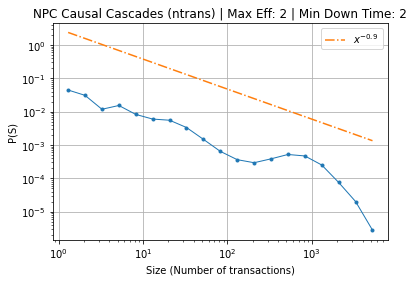

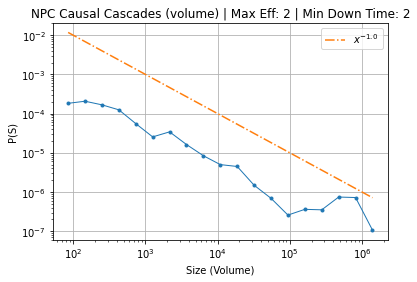

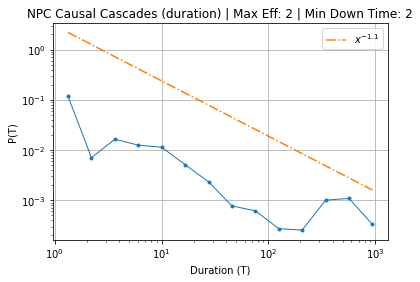

In [16]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.9)*3, '-.', label= "$x^{-0.9}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*3, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

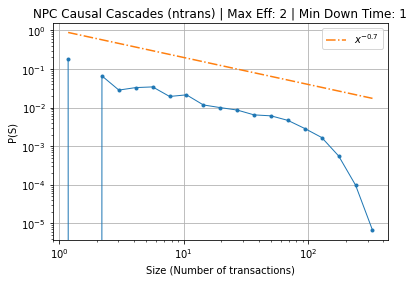

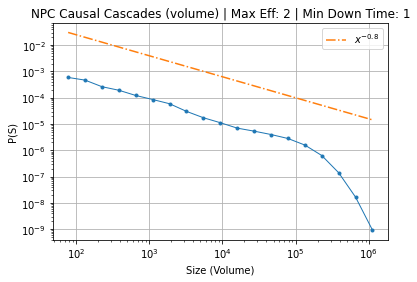

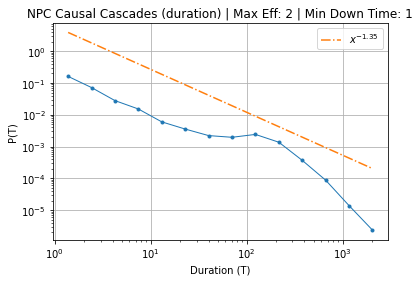

In [21]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.7), '-.', label= "$x^{-0.7}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*6, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

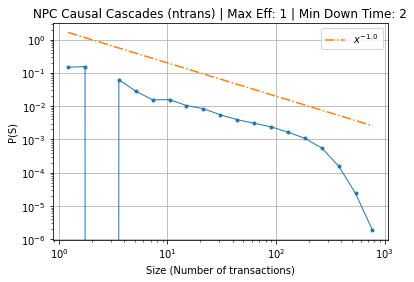

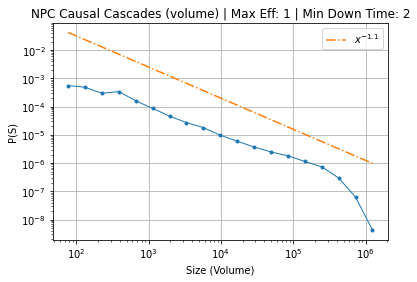

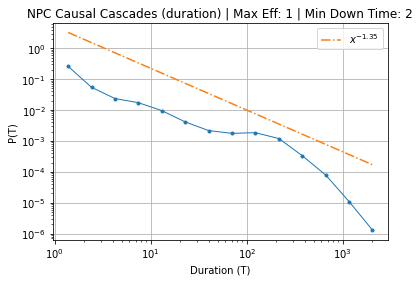

In [23]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*5, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

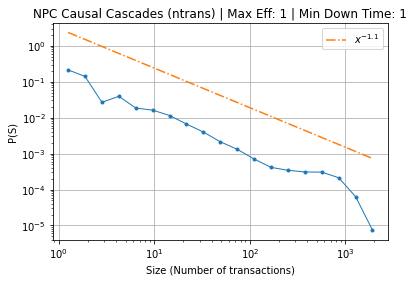

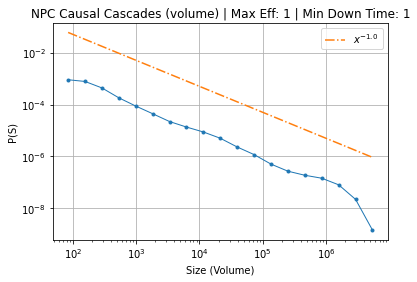

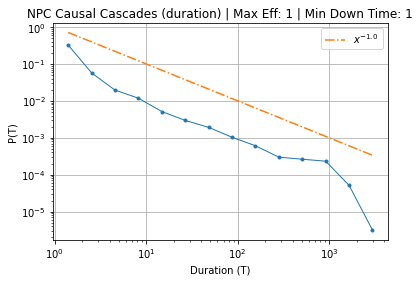

In [12]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*3, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [8]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

,Unnamed: 0,time,portfolio,stock,order
41,9,993,zjwdk,51,-2.0
69,2,993,ztnkc,15,1.0
70,4,993,ztnkc,60,-1.0
71,7,993,ztnkc,95,-1.0
262,3,993,zdmkf,98,9.0
...,...,...,...,...,...
7088500,2,8192,gnqpm,56,-25.0
7088501,3,8192,gnqpm,55,10.0
7088502,5,8192,gnqpm,79,2.0
7088503,6,8192,gnqpm,85,19.0


In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

,Unnamed: 0,time,portfolio,stock,order
2,2,993,gozxi,6,-1.0
3,6,993,gozxi,10,2.0
4,7,993,gozxi,11,1.0
5,9,993,gozxi,13,-1.0
6,10,993,gozxi,14,-2.0
...,...,...,...,...,...
1081,7,993,zwjtq,55,-2.0
1082,0,993,myduz,56,14.0
1083,1,993,myduz,55,-18.0
1084,4,993,myduz,85,38.0
